In [1]:
#most same as Unpol_proposal_pip_lowPt, but I want to try some fit on it
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
Factor = 0.3894*1e6/137
Factor_max=1.1*Factor
Factor_min=0.9*Factor
def Get_weighted_average(value,error):
    #Factor=2841.438#((1/137)*0.3894*1e6)
    Factor = 0.3894*1e6/137
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return Factor*sum_mean/sum_sigma,Factor*math.sqrt(1/sum_sigma)
def Get_weighted_average_phi(value,error):
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
sys = 11
def Get_Sys_table(xl,pTl):
    if xl==0 and pTl==0:
        #Sys=[[12.1/100,9.2/100,11.5/100],[11.8/100,8.8/100,11.2/100],[11.8/100,8.8/100,11.7/100],[11.8/100,9/100,12.9/100]]
        Sys=[[sys/100,sys/100,sys/100],[sys/100,sys/100,sys/100],[sys/100,sys/100,sys/100],[sys/100,sys/100,sys/100]]
        return Sys
        #return 12.5/100
    if xl==0 and pTl==0.2:
        #Sys=[[9.3/100,8.4/100,9.95/100],[8.93/100,7.91/100,9.59/100],[8.93/100,7.91/100,10.02/100],[8.93/100,8.17/100,11.6/100]]
        Sys=[[sys/100,sys/100,sys/100],[sys/100,sys/100,sys/100],[sys/100,sys/100,sys/100],[sys/100,sys/100,sys/100]]
        return Sys
        #return 12.5/100
    #return 12.5/100
Factor_3xs=math.sqrt(5)
Factor_3xspim=math.sqrt(5)

In [3]:
#df_1xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_results/default/CS_default_x1_stat0/CS_default_x1_stat0_pip.dat',delim_whitespace=True)
df_1xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/output_default_1xs_stat0.dat',delim_whitespace=True)
#df_1xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/output_default_1xs_pim_stat0.dat',delim_whitespace=True)

#df_1xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/simenhanced_1xs.dat',delim_whitespace=True)

#df_1xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_ptheta_output.dat',delim_whitespace=True)

#df_1xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/simenhanced_1xs_piminus.dat',delim_whitespace=True)
df_1xs_zQ2xbjPhT.head()
#print(np.sort(df_1xs_zQ2xbjPhT['phih'].unique()))

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.125,-2.844259,0.48445,0.35,1.25,0.1,FUUT,0.167239,0.000938,0.0,0.0,neutron,pi+,solid,0.000938
1,1,11.0,0.125,-2.832717,0.48445,0.35,1.25,0.1,FUUT,0.167239,0.000955,0.0,0.0,neutron,pi+,solid,0.000955
2,2,11.0,0.125,-2.829297,0.48445,0.35,1.25,0.1,FUUT,0.167239,0.000998,0.0,0.0,neutron,pi+,solid,0.000998
3,3,11.0,0.125,-2.827976,0.48445,0.35,1.25,0.1,FUUT,0.167239,0.000956,0.0,0.0,neutron,pi+,solid,0.000956
4,4,11.0,0.125,-2.823566,0.48445,0.35,1.25,0.1,FUUT,0.167239,0.001224,0.0,0.0,neutron,pi+,solid,0.001224


In [4]:
#Everything is set to be bincenter, except phih, then FuuT value is calculated by the corresponding center value
#df_3xspim_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/output_default_3xs_pim_stat0.dat',delim_whitespace=True)#it's actually stat0, this is for pip
#df_3xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/output_default_3xs_stat1.dat',delim_whitespace=True)#it's actually stat0, this is for pip

#output2 means Everything to center, not phih
#df_3xspim_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_modified/output2_CS3xs_default_x1_stat0_pim_2024.dat',delim_whitespace=False)
#df_3xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_modified/output2_CS3xs_default_x1_stat0_pip_2024.dat',delim_whitespace=False)

#Bin average everywhere
df_3xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_results/default_3xs_2024/CS3xs_default_x1_stat0_pip_new.dat',delim_whitespace=True)
df_3xspim_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_modified/CS3xs_default_x1_stat0_new.dat',delim_whitespace=True)


df_3xs_zQ2xbjPhT.head()

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.103017,-2.844259,0.565646,0.322474,1.201749,0.081033,FUUT,0.256044,0.000938,0.0,0.0,neutron,pi+,solid,0.000938
1,1,11.0,0.118815,-2.832717,0.540861,0.323261,1.325817,0.072544,FUUT,0.220936,0.000955,0.0,0.0,neutron,pi+,solid,0.000955
2,2,11.0,0.131035,-2.829297,0.506799,0.323379,1.370059,0.068226,FUUT,0.213890,0.000998,0.0,0.0,neutron,pi+,solid,0.000998
3,3,11.0,0.146572,-2.827976,0.466217,0.323332,1.408901,0.066989,FUUT,0.209912,0.000956,0.0,0.0,neutron,pi+,solid,0.000956
4,4,11.0,0.169117,-2.823566,0.416780,0.323738,1.452023,0.063966,FUUT,0.203138,0.001224,0.0,0.0,neutron,pi+,solid,0.001224


In [5]:
PI = math.pi
print(PI)
z_cuts=[0.3,0.4,0.5,0.6]
#z_cuts=[0.3,0.35,0.4,0.45]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
#Q2_cuts=[3,3.5,4,4.5,5]
xbj_cuts=[0,0.25]
#xbj_cuts=[0.25,0.5]
PhT_cuts=[0,0.2]
#PhT_cuts=[0.2,0.4]
#PhT_cuts=[0.4,0.6]
#phih_bins = [-3.14,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3.14]
phih_bins =[-PI,-4*PI/5,-3*PI/5,-2*PI/5,-PI/5,PI/5,2*PI/5,3*PI/5,4*PI/5,PI]
#phih_bins =[-PI,-0.9*PI,-0.8*PI,-0.7*PI,-0.6*PI,-0.5*PI,-0.4*PI,-0.3*PI,-0.2*PI,-0.1*PI,0,0.1*PI,0.2*PI,0.3*PI,0.4*PI,0.5*PI,0.6*PI,0.7*PI,0.8*PI,0.9*PI,PI]
df_1xs_zQ2=df_1xs_zQ2xbjPhT[(df_1xs_zQ2xbjPhT['Ebeam']==11)&(df_1xs_zQ2xbjPhT['x']>xbj_cuts[0])&(df_1xs_zQ2xbjPhT['x']<xbj_cuts[1])&(df_1xs_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_1xs_zQ2xbjPhT['pT']<PhT_cuts[1])]
df_3xs_zQ2=df_3xs_zQ2xbjPhT[(df_3xs_zQ2xbjPhT['Ebeam']==11)&(df_3xs_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_zQ2xbjPhT['x']<xbj_cuts[1])&(df_3xs_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_3xs_zQ2xbjPhT['pT']<PhT_cuts[1])]
df_3xspim_zQ2=df_3xspim_zQ2xbjPhT[(df_3xspim_zQ2xbjPhT['Ebeam']==11)&(df_3xspim_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xspim_zQ2xbjPhT['x']<xbj_cuts[1])&(df_3xspim_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_3xspim_zQ2xbjPhT['pT']<PhT_cuts[1])]

Sys_table = Get_Sys_table(xbj_cuts[0],PhT_cuts[0])

3.141592653589793


In [6]:
#print(Sys_table)

In [7]:
df_1xs_1_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2668002078.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_1_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2668002078.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_1_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]


In [8]:
df_3xs_1_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1735272136.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1735272136.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]


In [9]:
df_3xspim_1_1 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[0]][df_3xspim_zQ2['z']<z_cuts[1]][df_3xspim_zQ2['Q2']>Q2_cuts[0]][df_3xspim_zQ2['Q2']<Q2_cuts[1]]
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]))
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]['phih'].unique()))

368
367


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/522565343.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_1_1 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[0]][df_3xspim_zQ2['z']<z_cuts[1]][df_3xspim_zQ2['Q2']>Q2_cuts[0]][df_3xspim_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/522565343.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_1_1 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[0]][df_3xspim_zQ2['z']<z_cuts[1]][df_3xspim_zQ2['Q2']>Q2_cuts[0]][df_3xspim_zQ2['Q2']<Q2_cuts[1]]


In [10]:
df_1xs_1_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/187137021.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_1_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/187137021.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_1_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/187137021.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_1_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]


In [11]:
df_3xs_1_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/660959689.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/660959689.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/660959689.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]


In [12]:
df_3xspim_1_2 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[1]][df_3xspim_zQ2['z']<z_cuts[2]][df_3xspim_zQ2['Q2']>Q2_cuts[0]][df_3xspim_zQ2['Q2']<Q2_cuts[1]]
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]))
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]['phih'].unique()))

368
367


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1141935991.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_1_2 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[1]][df_3xspim_zQ2['z']<z_cuts[2]][df_3xspim_zQ2['Q2']>Q2_cuts[0]][df_3xspim_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1141935991.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_1_2 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[1]][df_3xspim_zQ2['z']<z_cuts[2]][df_3xspim_zQ2['Q2']>Q2_cuts[0]][df_3xspim_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1141935991.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_1_2 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[1]][df_3xspim_zQ2['z']<z_cuts[2]][df_3xspim_zQ2['Q2']>Q2_cuts[0]][df_3xspim_zQ2['Q2']<Q2_cuts[1]]


In [13]:
df_1xs_1_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2016405503.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_1_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2016405503.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_1_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2016405503.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_1_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]


In [14]:
df_3xs_1_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2130574157.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2130574157.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2130574157.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]


In [15]:
df_3xspim_1_3 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[2]][df_3xspim_zQ2['z']<z_cuts[3]][df_3xspim_zQ2['Q2']>Q2_cuts[0]][df_3xspim_zQ2['Q2']<Q2_cuts[1]]
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]))
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]['phih'].unique()))

368
367


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3590019559.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_1_3 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[2]][df_3xspim_zQ2['z']<z_cuts[3]][df_3xspim_zQ2['Q2']>Q2_cuts[0]][df_3xspim_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3590019559.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_1_3 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[2]][df_3xspim_zQ2['z']<z_cuts[3]][df_3xspim_zQ2['Q2']>Q2_cuts[0]][df_3xspim_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3590019559.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_1_3 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[2]][df_3xspim_zQ2['z']<z_cuts[3]][df_3xspim_zQ2['Q2']>Q2_cuts[0]][df_3xspim_zQ2['Q2']<Q2_cuts[1]]


In [16]:
df_1xs_2_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/4258856607.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_2_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/4258856607.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_2_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]


In [17]:
df_3xs_2_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/38913910.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/38913910.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]


In [18]:
df_3xspim_2_1 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[0]][df_3xspim_zQ2['z']<z_cuts[1]][df_3xspim_zQ2['Q2']>Q2_cuts[1]][df_3xspim_zQ2['Q2']<Q2_cuts[2]]
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]))
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]['phih'].unique()))

368
367


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2031178247.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_2_1 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[0]][df_3xspim_zQ2['z']<z_cuts[1]][df_3xspim_zQ2['Q2']>Q2_cuts[1]][df_3xspim_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2031178247.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_2_1 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[0]][df_3xspim_zQ2['z']<z_cuts[1]][df_3xspim_zQ2['Q2']>Q2_cuts[1]][df_3xspim_zQ2['Q2']<Q2_cuts[2]]


In [19]:
df_1xs_2_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/957587887.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_2_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/957587887.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_2_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/957587887.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_2_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]


In [20]:
df_3xs_2_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1303666535.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1303666535.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1303666535.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]


In [21]:
df_3xspim_2_2 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[1]][df_3xspim_zQ2['z']<z_cuts[2]][df_3xspim_zQ2['Q2']>Q2_cuts[1]][df_3xspim_zQ2['Q2']<Q2_cuts[2]]
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]))
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]['phih'].unique()))

368
367


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2175050052.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_2_2 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[1]][df_3xspim_zQ2['z']<z_cuts[2]][df_3xspim_zQ2['Q2']>Q2_cuts[1]][df_3xspim_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2175050052.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_2_2 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[1]][df_3xspim_zQ2['z']<z_cuts[2]][df_3xspim_zQ2['Q2']>Q2_cuts[1]][df_3xspim_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2175050052.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_2_2 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[1]][df_3xspim_zQ2['z']<z_cuts[2]][df_3xspim_zQ2['Q2']>Q2_cuts[1]][df_3xspim_zQ2['Q2']<Q2_cuts[2]]


In [22]:
df_1xs_2_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/614530096.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_2_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/614530096.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_2_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/614530096.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_2_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]


In [23]:
df_3xs_2_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2563255446.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2563255446.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2563255446.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]


In [24]:
df_3xspim_2_3 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[2]][df_3xspim_zQ2['z']<z_cuts[3]][df_3xspim_zQ2['Q2']>Q2_cuts[1]][df_3xspim_zQ2['Q2']<Q2_cuts[2]]
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]))
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]['phih'].unique()))

368
367


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2865092949.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_2_3 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[2]][df_3xspim_zQ2['z']<z_cuts[3]][df_3xspim_zQ2['Q2']>Q2_cuts[1]][df_3xspim_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2865092949.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_2_3 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[2]][df_3xspim_zQ2['z']<z_cuts[3]][df_3xspim_zQ2['Q2']>Q2_cuts[1]][df_3xspim_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2865092949.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_2_3 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[2]][df_3xspim_zQ2['z']<z_cuts[3]][df_3xspim_zQ2['Q2']>Q2_cuts[1]][df_3xspim_zQ2['Q2']<Q2_cuts[2]]


In [25]:
df_1xs_3_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2105384112.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_3_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2105384112.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_3_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]


In [26]:
df_3xs_3_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3731236058.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3731236058.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]


In [27]:
df_3xspim_3_1 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[0]][df_3xspim_zQ2['z']<z_cuts[1]][df_3xspim_zQ2['Q2']>Q2_cuts[2]][df_3xspim_zQ2['Q2']<Q2_cuts[3]]
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]))
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]['phih'].unique()))

368
367


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1248809513.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_3_1 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[0]][df_3xspim_zQ2['z']<z_cuts[1]][df_3xspim_zQ2['Q2']>Q2_cuts[2]][df_3xspim_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1248809513.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_3_1 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[0]][df_3xspim_zQ2['z']<z_cuts[1]][df_3xspim_zQ2['Q2']>Q2_cuts[2]][df_3xspim_zQ2['Q2']<Q2_cuts[3]]


In [28]:
df_1xs_3_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2875546147.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_3_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2875546147.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_3_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2875546147.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_3_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]


In [29]:
df_3xs_3_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/4239354454.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/4239354454.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/4239354454.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]


In [30]:
df_3xspim_3_2 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[1]][df_3xspim_zQ2['z']<z_cuts[2]][df_3xspim_zQ2['Q2']>Q2_cuts[2]][df_3xspim_zQ2['Q2']<Q2_cuts[3]]
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]))
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]['phih'].unique()))

368
367


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/4261538109.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_3_2 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[1]][df_3xspim_zQ2['z']<z_cuts[2]][df_3xspim_zQ2['Q2']>Q2_cuts[2]][df_3xspim_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/4261538109.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_3_2 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[1]][df_3xspim_zQ2['z']<z_cuts[2]][df_3xspim_zQ2['Q2']>Q2_cuts[2]][df_3xspim_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/4261538109.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_3_2 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[1]][df_3xspim_zQ2['z']<z_cuts[2]][df_3xspim_zQ2['Q2']>Q2_cuts[2]][df_3xspim_zQ2['Q2']<Q2_cuts[3]]


In [31]:
df_1xs_3_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3204621015.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_3_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3204621015.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_3_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3204621015.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_3_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]


In [32]:
df_3xs_3_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/165647900.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/165647900.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/165647900.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]


In [33]:
df_3xspim_3_3 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[2]][df_3xspim_zQ2['z']<z_cuts[3]][df_3xspim_zQ2['Q2']>Q2_cuts[2]][df_3xspim_zQ2['Q2']<Q2_cuts[3]]
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]))
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]['phih'].unique()))

368
367


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2748888959.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_3_3 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[2]][df_3xspim_zQ2['z']<z_cuts[3]][df_3xspim_zQ2['Q2']>Q2_cuts[2]][df_3xspim_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2748888959.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_3_3 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[2]][df_3xspim_zQ2['z']<z_cuts[3]][df_3xspim_zQ2['Q2']>Q2_cuts[2]][df_3xspim_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2748888959.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_3_3 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[2]][df_3xspim_zQ2['z']<z_cuts[3]][df_3xspim_zQ2['Q2']>Q2_cuts[2]][df_3xspim_zQ2['Q2']<Q2_cuts[3]]


In [34]:
df_1xs_4_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1080734928.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_4_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1080734928.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_4_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]


In [35]:
df_3xs_4_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2895693434.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2895693434.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]


In [36]:
df_3xspim_4_1 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[0]][df_3xspim_zQ2['z']<z_cuts[1]][df_3xspim_zQ2['Q2']>Q2_cuts[3]][df_3xspim_zQ2['Q2']<Q2_cuts[4]]
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]))
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]['phih'].unique()))

368
367


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1144236519.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_4_1 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[0]][df_3xspim_zQ2['z']<z_cuts[1]][df_3xspim_zQ2['Q2']>Q2_cuts[3]][df_3xspim_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1144236519.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_4_1 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[0]][df_3xspim_zQ2['z']<z_cuts[1]][df_3xspim_zQ2['Q2']>Q2_cuts[3]][df_3xspim_zQ2['Q2']<Q2_cuts[4]]


In [37]:
df_1xs_4_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1416687606.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_4_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1416687606.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_4_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1416687606.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_4_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]


In [38]:
df_3xs_4_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2507560876.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2507560876.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2507560876.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]


In [39]:
df_3xspim_4_2 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[1]][df_3xspim_zQ2['z']<z_cuts[2]][df_3xspim_zQ2['Q2']>Q2_cuts[3]][df_3xspim_zQ2['Q2']<Q2_cuts[4]]
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]))
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]['phih'].unique()))

368
367


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/420508198.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_4_2 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[1]][df_3xspim_zQ2['z']<z_cuts[2]][df_3xspim_zQ2['Q2']>Q2_cuts[3]][df_3xspim_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/420508198.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_4_2 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[1]][df_3xspim_zQ2['z']<z_cuts[2]][df_3xspim_zQ2['Q2']>Q2_cuts[3]][df_3xspim_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/420508198.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_4_2 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[1]][df_3xspim_zQ2['z']<z_cuts[2]][df_3xspim_zQ2['Q2']>Q2_cuts[3]][df_3xspim_zQ2['Q2']<Q2_cuts[4]]


In [40]:
df_1xs_4_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1020995793.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_4_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1020995793.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_4_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1020995793.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_4_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]


In [41]:
df_3xs_4_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

208
208


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1849816026.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1849816026.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1849816026.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]


In [42]:
df_3xspim_4_3 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[2]][df_3xspim_zQ2['z']<z_cuts[3]][df_3xspim_zQ2['Q2']>Q2_cuts[3]][df_3xspim_zQ2['Q2']<Q2_cuts[4]]
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]))
print(len(df_3xspim_1_1[df_3xspim_1_1['Ebeam']==11.0]['phih'].unique()))

368
367


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/610970380.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_4_3 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[2]][df_3xspim_zQ2['z']<z_cuts[3]][df_3xspim_zQ2['Q2']>Q2_cuts[3]][df_3xspim_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/610970380.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_4_3 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[2]][df_3xspim_zQ2['z']<z_cuts[3]][df_3xspim_zQ2['Q2']>Q2_cuts[3]][df_3xspim_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/610970380.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xspim_4_3 = df_3xspim_zQ2[df_3xspim_zQ2['z']>z_cuts[2]][df_3xspim_zQ2['z']<z_cuts[3]][df_3xspim_zQ2['Q2']>Q2_cuts[3]][df_3xspim_zQ2['Q2']<Q2_cuts[4]]


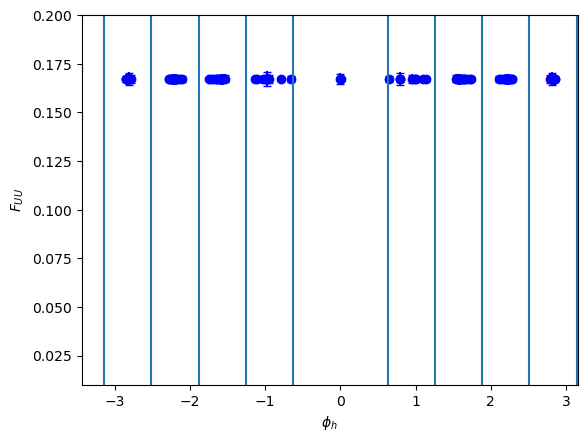

In [43]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_1 = df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih']
Fuu_1_1 = df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['value']
for i_phih_1_1 in phih_1_1:
    Fuu_value = df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0][df_1xs_1_1['phih']==i_phih_1_1]['value']
    Fuu_stat = df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0][df_1xs_1_1['phih']==i_phih_1_1]['stat']
    #Fuu_1_1_sys.append(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0][df_1xs_1_1['phih']==i_phih_1_1]['systabs'])
    ax.plot([i_phih_1_1,i_phih_1_1],[Fuu_value-Fuu_stat,Fuu_value+Fuu_stat],color='blue',marker='_')
plt.plot(phih_1_1,Fuu_1_1,'bo',label='Eb=11GeV')
phih_1_1_sorted = df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0].sort_values(by=['phih'])['phih']
Fuu_1_1_sys = df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0].sort_values(by=['phih'])['error']
#ax.fill_between(phih_1_1_sorted,np.asarray(0.01)-np.asarray(Fuu_1_1_sys),np.asarray(0.01)+np.asarray(Fuu_1_1_sys),color='blue',alpha=0.25,linewidth=0,label='sys err')

phih_1_1_Eb2 = df_1xs_1_1[df_1xs_1_1['Ebeam']==8.8]['phih']
Fuu_1_1_Eb2 = df_1xs_1_1[df_1xs_1_1['Ebeam']==8.8]['value']
for i_phih_1_1_Eb2 in phih_1_1_Eb2:
    Fuu_value = df_1xs_1_1[df_1xs_1_1['Ebeam']==8.8][df_1xs_1_1['phih']==i_phih_1_1_Eb2]['value']
    Fuu_stat = df_1xs_1_1[df_1xs_1_1['Ebeam']==8.8][df_1xs_1_1['phih']==i_phih_1_1_Eb2]['stat']
    ax.plot([i_phih_1_1_Eb2,i_phih_1_1_Eb2],[Fuu_value-Fuu_stat,Fuu_value+Fuu_stat],color='blue',marker='_')
plt.plot(phih_1_1_Eb2,Fuu_1_1_Eb2,'bo',label='Eb=8.8GeV')
phih_1_1_Eb2_sorted = df_1xs_1_1[df_1xs_1_1['Ebeam']==8.8].sort_values(by=['phih'])['phih']
Fuu_1_1_Eb2_sys = df_1xs_1_1[df_1xs_1_1['Ebeam']==8.8].sort_values(by=['phih'])['error']
#ax.fill_between(phih_1_1_Eb2_sorted,np.asarray(0.01)-np.asarray(Fuu_1_1_Eb2_sys),np.asarray(0.01)+np.asarray(Fuu_1_1_Eb2_sys),color='blue',alpha=0.25,linewidth=0,label='sys err')

plt.xlabel('$\phi_h$')
plt.ylabel('$F_{UU}$')
plt.ylim(0.01,0.2)
#plt.yscale('log')
for i_phih in phih_bins:
    plt.axvline(x=i_phih)
#plt.savefig('../Unpol_proposal/Materials/phi.pdf')


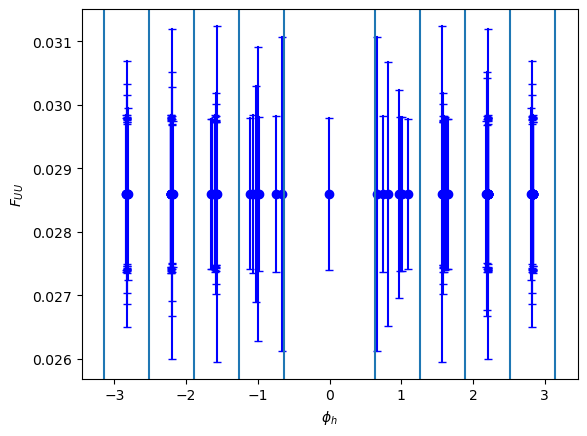

In [44]:
fig = plt.figure()
ax = fig.add_subplot()
phih_4_1 = df_1xs_4_1[df_1xs_4_1['Ebeam']==11.0]['phih']
Fuu_4_1 = df_1xs_4_1[df_1xs_4_1['Ebeam']==11.0]['value']
for i_phih_4_1 in phih_4_1:
    Fuu_value = df_1xs_4_1[df_1xs_4_1['Ebeam']==11.0][df_1xs_4_1['phih']==i_phih_4_1]['value']
    Fuu_stat = df_1xs_4_1[df_1xs_4_1['Ebeam']==11.0][df_1xs_4_1['phih']==i_phih_4_1]['stat']
    #Fuu_4_1_sys.append(df_1xs_4_1[df_1xs_4_1['Ebeam']==11.0][df_1xs_4_1['phih']==i_phih_4_1]['systabs'])
    ax.plot([i_phih_4_1,i_phih_4_1],[Fuu_value-Fuu_stat,Fuu_value+Fuu_stat],color='blue',marker='_')
plt.plot(phih_4_1,Fuu_4_1,'bo',label='Eb=11GeV')
phih_4_1_sorted = df_1xs_4_1[df_1xs_4_1['Ebeam']==11.0].sort_values(by=['phih'])['phih']
#Fuu_4_1_sys = df_1xs_4_1[df_1xs_4_1['Ebeam']==11.0].sort_values(by=['phih'])['error']
#ax.fill_between(phih_4_1_sorted,np.asarray(0.01)-np.asarray(Fuu_4_1_sys),np.asarray(0.01)+np.asarray(Fuu_4_1_sys),color='blue',alpha=0.25,linewidth=0,label='sys err')

phih_4_1_Eb2 = df_1xs_4_1[df_1xs_4_1['Ebeam']==8.8]['phih']
Fuu_4_1_Eb2 = df_1xs_4_1[df_1xs_4_1['Ebeam']==8.8]['value']
for i_phih_4_1_Eb2 in phih_4_1_Eb2:
    Fuu_value = df_1xs_4_1[df_1xs_4_1['Ebeam']==8.8][df_1xs_4_1['phih']==i_phih_4_1_Eb2]['value']
    Fuu_stat = df_1xs_4_1[df_1xs_4_1['Ebeam']==8.8][df_1xs_4_1['phih']==i_phih_4_1_Eb2]['stat']
    ax.plot([i_phih_4_1_Eb2,i_phih_4_1_Eb2],[Fuu_value-Fuu_stat,Fuu_value+Fuu_stat],color='blue',marker='_')
plt.plot(phih_4_1_Eb2,Fuu_4_1_Eb2,'bo',label='Eb=8.8GeV')
phih_4_1_Eb2_sorted = df_1xs_4_1[df_1xs_4_1['Ebeam']==8.8].sort_values(by=['phih'])['phih']
#Fuu_4_1_Eb2_sys = df_1xs_4_1[df_1xs_4_1['Ebeam']==8.8].sort_values(by=['phih'])['error']
#ax.fill_between(phih_4_1_Eb2_sorted,np.asarray(0.01)-np.asarray(Fuu_4_1_Eb2_sys),np.asarray(0.01)+np.asarray(Fuu_4_1_Eb2_sys),color='blue',alpha=0.25,linewidth=0,label='sys err')

plt.xlabel('$\phi_h$')
plt.ylabel('$F_{UU}$')
#plt.ylim(0.002,0.01)
#plt.yscale('log')
for i_phih in phih_bins:
    plt.axvline(x=i_phih)
#plt.savefig('../Unpol_proposal/Materials/phi.pdf')


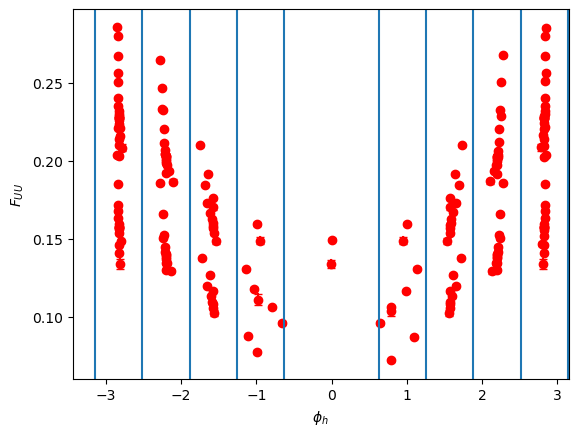

In [45]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_1 = df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih']
Fuu_1_1 = df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['value']
for i_phih_1_1 in phih_1_1:
    Fuu_value = df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0][df_3xs_1_1['phih']==i_phih_1_1]['value']
    Fuu_stat = df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0][df_3xs_1_1['phih']==i_phih_1_1]['stat']
    #Fuu_1_1_sys.append(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0][df_3xs_1_1['phih']==i_phih_1_1]['systabs'])
    ax.plot([i_phih_1_1,i_phih_1_1],[Fuu_value-Fuu_stat,Fuu_value+Fuu_stat],color='red',marker='_')
plt.plot(phih_1_1,Fuu_1_1,'ro',label='Eb=11GeV')
phih_1_1_sorted = df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0].sort_values(by=['phih'])['phih']
#Fuu_1_1_sys = df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0].sort_values(by=['phih'])['error']
#ax.fill_between(phih_1_1_sorted,np.asarray(0.01)-np.asarray(Fuu_1_1_sys),np.asarray(0.01)+np.asarray(Fuu_1_1_sys),color='blue',alpha=0.25,linewidth=0,label='sys err')

phih_1_1_Eb2 = df_3xs_1_1[df_3xs_1_1['Ebeam']==8.8]['phih']
Fuu_1_1_Eb2 = df_3xs_1_1[df_3xs_1_1['Ebeam']==8.8]['value']
for i_phih_1_1_Eb2 in phih_1_1_Eb2:
    Fuu_value = df_3xs_1_1[df_3xs_1_1['Ebeam']==8.8][df_3xs_1_1['phih']==i_phih_1_1_Eb2]['value']
    Fuu_stat = df_3xs_1_1[df_3xs_1_1['Ebeam']==8.8][df_3xs_1_1['phih']==i_phih_1_1_Eb2]['stat']
    ax.plot([i_phih_1_1_Eb2,i_phih_1_1_Eb2],[Fuu_value-Fuu_stat,Fuu_value+Fuu_stat],color='red',marker='_')
plt.plot(phih_1_1_Eb2,Fuu_1_1_Eb2,'ro',label='Eb=8.8GeV')
phih_1_1_Eb2_sorted = df_3xs_1_1[df_3xs_1_1['Ebeam']==8.8].sort_values(by=['phih'])['phih']
#Fuu_1_1_Eb2_sys = df_3xs_1_1[df_3xs_1_1['Ebeam']==8.8].sort_values(by=['phih'])['error']
#ax.fill_between(phih_1_1_Eb2_sorted,np.asarray(0.01)-np.asarray(Fuu_1_1_Eb2_sys),np.asarray(0.01)+np.asarray(Fuu_1_1_Eb2_sys),color='blue',alpha=0.25,linewidth=0,label='sys err')

plt.xlabel('$\phi_h$')
plt.ylabel('$F_{UU}$')
#plt.ylim(0.01,0.2)
#plt.yscale('log')
for i_phih in phih_bins:
    plt.axvline(x=i_phih)
#plt.savefig('../Unpol_proposal/Materials/3xs_phi.pdf')


-3.141592653589793 -2.5132741228718345
39
_Fuu_1_1 475.3492779616202
_phih -2.8308097806802106
_Fuu_stat 0.42049677176048933
-2.5132741228718345 -1.8849555921538759
33
_Fuu_1_1 475.3492779616205
_phih -2.2143255119757224
_Fuu_stat 0.456430439034853
-1.8849555921538759 -1.2566370614359172
22
_Fuu_1_1 475.34927796162026
_phih -1.615432240542432
_Fuu_stat 0.5945277111095563
-1.2566370614359172 -0.6283185307179586
9
_Fuu_1_1 475.34927796162026
_phih -0.9822691913303133
_Fuu_stat 1.0993999686873768
-0.6283185307179586 0.6283185307179586
2
_Fuu_1_1 475.34927796162026
_phih 0.0014374805415050345
_Fuu_stat 2.668622303030794
0.6283185307179586 1.2566370614359172
9
_Fuu_1_1 475.34927796162015
_phih 0.9510172848810212
_Fuu_stat 1.083910784206962
1.2566370614359172 1.8849555921538759
22
_Fuu_1_1 475.34927796162015
_phih 1.6154858650120008
_Fuu_stat 0.5943355358596036
1.8849555921538759 2.5132741228718345
33
_Fuu_1_1 475.3492779616205
_phih 2.214210802823194
_Fuu_stat 0.45650413750249746
2.51327412

/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3498422548.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_1s = df_1xs_1_1[df_1xs_1_1['phih']>=i_phi_left][df_1xs_1_1['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3498422548.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_1s = df_1xs_1_1[df_1xs_1_1['phih']>=i_phi_left][df_1xs_1_1['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3498422548.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_1_stats = df_1xs_1_1[df_1xs_1_1['phih']>=i_phi_left][df_1xs_1_1['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3498422548.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_1s = df_1xs_1_1[df_1xs_1_1['phih']>=i_phi_left][df_

Text(0, 0.5, '$F_{UU}$')

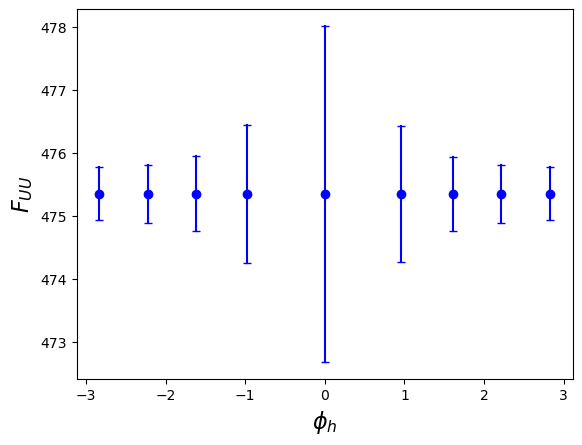

In [46]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_1=[]
Fuu_1_1=[]
Fuu_1_1_stat=[]
Fuu_1_1_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_1_1s = df_1xs_1_1[df_1xs_1_1['phih']>=i_phi_left][df_1xs_1_1['phih']<i_phi]['phih'].tolist()
    Fuu_1_1s = df_1xs_1_1[df_1xs_1_1['phih']>=i_phi_left][df_1xs_1_1['phih']<i_phi]['value'].tolist()
    Fuu_1_1_stats = df_1xs_1_1[df_1xs_1_1['phih']>=i_phi_left][df_1xs_1_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_1_1s))
    
    if len(phih_1_1s)>0:  
        #print('phih',phih_1_1s)
        #print('Fuu',Fuu_1_1s)
        #print('Fuu_stat',Fuu_1_1_stats)
        _Fuu_1_1 = Get_weighted_average(Fuu_1_1s,Fuu_1_1_stats)[0]
        _Fuu_1_1_stat = Get_weighted_average(Fuu_1_1s,Fuu_1_1_stats)[1]
        _phih_1_1= Get_weighted_average_phi(phih_1_1s,Fuu_1_1_stats)[0]
        print('_Fuu_1_1',_Fuu_1_1)
        print('_phih',_phih_1_1)
        print('_Fuu_stat',_Fuu_1_1_stat)
        Fuu_1_1.append(_Fuu_1_1)
        phih_1_1.append(_phih_1_1)
        Fuu_1_1_stat.append(_Fuu_1_1_stat)
        Fuu_1_1_sys.append(Sys_table[0][0]*_Fuu_1_1)
        #print(Fuu_1_1,phih_1_1)
        ax.plot([_phih_1_1,_phih_1_1],[_Fuu_1_1-_Fuu_1_1_stat,_Fuu_1_1+_Fuu_1_1_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_1_1,Fuu_1_1,'bo')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
24
-2.5132741228718345 -1.8849555921538759
25
-1.8849555921538759 -1.2566370614359172
17
-1.2566370614359172 -0.6283185307179586
6
-0.6283185307179586 0.6283185307179586
7
0.6283185307179586 1.2566370614359172
7
1.2566370614359172 1.8849555921538759
16
1.8849555921538759 2.5132741228718345
21
2.5132741228718345 3.141592653589793
25


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2884387368.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_2s = df_1xs_1_2[df_1xs_1_2['phih']>=i_phi_left][df_1xs_1_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2884387368.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_2s = df_1xs_1_2[df_1xs_1_2['phih']>=i_phi_left][df_1xs_1_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2884387368.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_2_stats = df_1xs_1_2[df_1xs_1_2['phih']>=i_phi_left][df_1xs_1_2['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2884387368.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_2s = df_1xs_1_2[df_1xs_1_2['phih']>=i_phi_left][df_

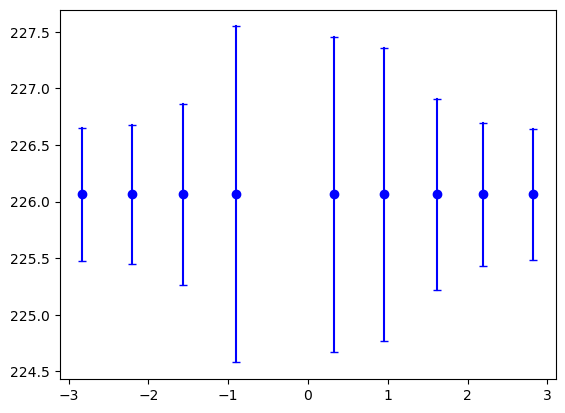

In [47]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_2=[]
Fuu_1_2=[]
Fuu_1_2_stat=[]
Fuu_1_2_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_1_2s = df_1xs_1_2[df_1xs_1_2['phih']>=i_phi_left][df_1xs_1_2['phih']<i_phi]['phih'].tolist()
    Fuu_1_2s = df_1xs_1_2[df_1xs_1_2['phih']>=i_phi_left][df_1xs_1_2['phih']<i_phi]['value'].tolist()
    Fuu_1_2_stats = df_1xs_1_2[df_1xs_1_2['phih']>=i_phi_left][df_1xs_1_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_1_2s))
    
    if len(phih_1_2s)>0:  
        #print('phih',phih_1_2s)
        #print('Fuu',Fuu_1_2s)
        #print('Fuu_stat',Fuu_1_2_stats)
        _Fuu_1_2 = Get_weighted_average(Fuu_1_2s,Fuu_1_2_stats)[0]
        _Fuu_1_2_stat = Get_weighted_average(Fuu_1_2s,Fuu_1_2_stats)[1]
        _phih_1_2= Get_weighted_average_phi(phih_1_2s,Fuu_1_2_stats)[0]
        #print('_Fuu_1_2',_Fuu_1_2)
        #print('_phih',_phih_1_2)
        #print('_Fuu_stat',_Fuu_1_2_stat)
        Fuu_1_2.append(_Fuu_1_2)
        phih_1_2.append(_phih_1_2)
        Fuu_1_2_stat.append(_Fuu_1_2_stat)
        Fuu_1_2_sys.append(Sys_table[0][1]*_Fuu_1_2)
        #print(Fuu_1_2,phih_1_2)
        ax.plot([_phih_1_2,_phih_1_2],[_Fuu_1_2-_Fuu_1_2_stat,_Fuu_1_2+_Fuu_1_2_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_1_2,Fuu_1_2,'bo')

-3.141592653589793 -2.5132741228718345
12
-2.5132741228718345 -1.8849555921538759
7
-1.8849555921538759 -1.2566370614359172
7
-1.2566370614359172 -0.6283185307179586
3
-0.6283185307179586 0.6283185307179586
3
0.6283185307179586 1.2566370614359172
2
1.2566370614359172 1.8849555921538759
7
1.8849555921538759 2.5132741228718345
7
2.5132741228718345 3.141592653589793
11


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2565403742.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_3s = df_1xs_1_3[df_1xs_1_3['phih']>=i_phi_left][df_1xs_1_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2565403742.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_3s = df_1xs_1_3[df_1xs_1_3['phih']>=i_phi_left][df_1xs_1_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2565403742.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_3_stats = df_1xs_1_3[df_1xs_1_3['phih']>=i_phi_left][df_1xs_1_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2565403742.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_3s = df_1xs_1_3[df_1xs_1_3['phih']>=i_phi_left][df_

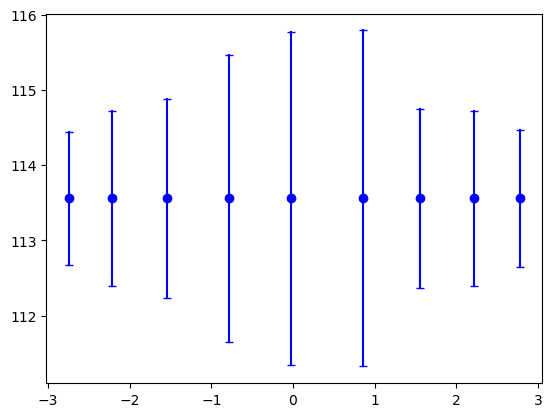

In [48]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_3=[]
Fuu_1_3=[]
Fuu_1_3_stat=[]
Fuu_1_3_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_1_3s = df_1xs_1_3[df_1xs_1_3['phih']>=i_phi_left][df_1xs_1_3['phih']<i_phi]['phih'].tolist()
    Fuu_1_3s = df_1xs_1_3[df_1xs_1_3['phih']>=i_phi_left][df_1xs_1_3['phih']<i_phi]['value'].tolist()
    Fuu_1_3_stats = df_1xs_1_3[df_1xs_1_3['phih']>=i_phi_left][df_1xs_1_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_1_3s))
    
    if len(phih_1_3s)>0:  
        #print('phih',phih_1_3s)
        #print('Fuu',Fuu_1_3s)
        #print('Fuu_stat',Fuu_1_3_stats)
        _Fuu_1_3 = Get_weighted_average(Fuu_1_3s,Fuu_1_3_stats)[0]
        _Fuu_1_3_stat = Get_weighted_average(Fuu_1_3s,Fuu_1_3_stats)[1]
        _phih_1_3= Get_weighted_average_phi(phih_1_3s,Fuu_1_3_stats)[0]
        #print('_Fuu_1_3',_Fuu_1_3)
        #print('_phih',_phih_1_3)
        #print('_Fuu_stat',_Fuu_1_3_stat)
        Fuu_1_3.append(_Fuu_1_3)
        phih_1_3.append(_phih_1_3)
        Fuu_1_3_stat.append(_Fuu_1_3_stat)
        Fuu_1_3_sys.append(Sys_table[0][2]*_Fuu_1_3)
        #print(Fuu_1_3,phih_1_3)
        ax.plot([_phih_1_3,_phih_1_3],[_Fuu_1_3-_Fuu_1_3_stat,_Fuu_1_3+_Fuu_1_3_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_1_3,Fuu_1_3,'bo')

-3.141592653589793 -2.5132741228718345
40
-2.5132741228718345 -1.8849555921538759
40
-1.8849555921538759 -1.2566370614359172
42
-1.2566370614359172 -0.6283185307179586
32
-0.6283185307179586 0.6283185307179586
30
0.6283185307179586 1.2566370614359172
32
1.2566370614359172 1.8849555921538759
42
1.8849555921538759 2.5132741228718345
40
2.5132741228718345 3.141592653589793
40


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1848739742.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_1s = df_1xs_2_1[df_1xs_2_1['phih']>=i_phi_left][df_1xs_2_1['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1848739742.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_1s = df_1xs_2_1[df_1xs_2_1['phih']>=i_phi_left][df_1xs_2_1['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1848739742.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_1_stats = df_1xs_2_1[df_1xs_2_1['phih']>=i_phi_left][df_1xs_2_1['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1848739742.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_1s = df_1xs_2_1[df_1xs_2_1['phih']>=i_phi_left][df_

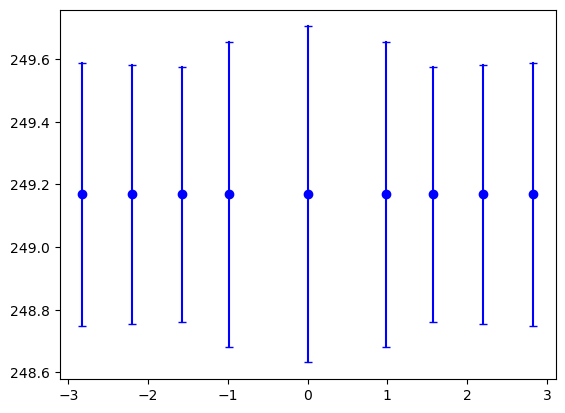

In [49]:
fig = plt.figure()
ax = fig.add_subplot()
phih_2_1=[]
Fuu_2_1=[]
Fuu_2_1_stat=[]
Fuu_2_1_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_2_1s = df_1xs_2_1[df_1xs_2_1['phih']>=i_phi_left][df_1xs_2_1['phih']<i_phi]['phih'].tolist()
    Fuu_2_1s = df_1xs_2_1[df_1xs_2_1['phih']>=i_phi_left][df_1xs_2_1['phih']<i_phi]['value'].tolist()
    Fuu_2_1_stats = df_1xs_2_1[df_1xs_2_1['phih']>=i_phi_left][df_1xs_2_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_2_1s))
    
    if len(phih_2_1s)>0:  
        #print('phih',phih_2_1s)
        #print('Fuu',Fuu_2_1s)
        #print('Fuu_stat',Fuu_2_1_stats)
        _Fuu_2_1 = Get_weighted_average(Fuu_2_1s,Fuu_2_1_stats)[0]
        _Fuu_2_1_stat = Get_weighted_average(Fuu_2_1s,Fuu_2_1_stats)[1]
        _phih_2_1= Get_weighted_average_phi(phih_2_1s,Fuu_2_1_stats)[0]
        #print('_Fuu_2_1',_Fuu_2_1)
        #print('_phih',_phih_2_1)
        #print('_Fuu_stat',_Fuu_2_1_stat)
        Fuu_2_1.append(_Fuu_2_1)
        phih_2_1.append(_phih_2_1)
        Fuu_2_1_stat.append(_Fuu_2_1_stat)
        Fuu_2_1_sys.append(Sys_table[1][0]*_Fuu_2_1)
        #print(Fuu_2_1,phih_2_1)
        ax.plot([_phih_2_1,_phih_2_1],[_Fuu_2_1-_Fuu_2_1_stat,_Fuu_2_1+_Fuu_2_1_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_2_1,Fuu_2_1,'bo')

-3.141592653589793 -2.5132741228718345
30
-2.5132741228718345 -1.8849555921538759
30
-1.8849555921538759 -1.2566370614359172
31
-1.2566370614359172 -0.6283185307179586
26
-0.6283185307179586 0.6283185307179586
36
0.6283185307179586 1.2566370614359172
26
1.2566370614359172 1.8849555921538759
31
1.8849555921538759 2.5132741228718345
30
2.5132741228718345 3.141592653589793
30


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/817337861.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_2s = df_1xs_2_2[df_1xs_2_2['phih']>=i_phi_left][df_1xs_2_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/817337861.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_2s = df_1xs_2_2[df_1xs_2_2['phih']>=i_phi_left][df_1xs_2_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/817337861.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_2_stats = df_1xs_2_2[df_1xs_2_2['phih']>=i_phi_left][df_1xs_2_2['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/817337861.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_2s = df_1xs_2_2[df_1xs_2_2['phih']>=i_phi_left][df_1xs_

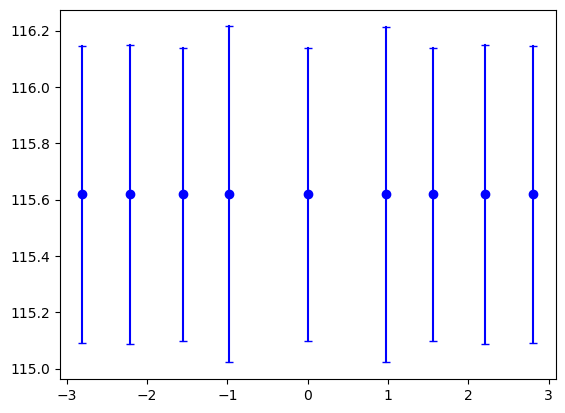

In [50]:
fig = plt.figure()
ax = fig.add_subplot()
phih_2_2=[]
Fuu_2_2=[]
Fuu_2_2_stat=[]
Fuu_2_2_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_2_2s = df_1xs_2_2[df_1xs_2_2['phih']>=i_phi_left][df_1xs_2_2['phih']<i_phi]['phih'].tolist()
    Fuu_2_2s = df_1xs_2_2[df_1xs_2_2['phih']>=i_phi_left][df_1xs_2_2['phih']<i_phi]['value'].tolist()
    Fuu_2_2_stats = df_1xs_2_2[df_1xs_2_2['phih']>=i_phi_left][df_1xs_2_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_2_2s))
    
    if len(phih_2_2s)>0:  
        #print('phih',phih_2_2s)
        #print('Fuu',Fuu_2_2s)
        #print('Fuu_stat',Fuu_2_2_stats)
        _Fuu_2_2 = Get_weighted_average(Fuu_2_2s,Fuu_2_2_stats)[0]
        _Fuu_2_2_stat = Get_weighted_average(Fuu_2_2s,Fuu_2_2_stats)[1]
        _phih_2_2= Get_weighted_average_phi(phih_2_2s,Fuu_2_2_stats)[0]
        #print('_Fuu_2_2',_Fuu_2_2)
        #print('_phih',_phih_2_2)
        #print('_Fuu_stat',_Fuu_2_2_stat)
        Fuu_2_2.append(_Fuu_2_2)
        phih_2_2.append(_phih_2_2)
        Fuu_2_2_stat.append(_Fuu_2_2_stat)
        Fuu_2_2_sys.append(Sys_table[1][1]*_Fuu_2_2)
        #print(Fuu_2_2,phih_2_2)
        ax.plot([_phih_2_2,_phih_2_2],[_Fuu_2_2-_Fuu_2_2_stat,_Fuu_2_2+_Fuu_2_2_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_2_2,Fuu_2_2,'bo')

-3.141592653589793 -2.5132741228718345
13
-2.5132741228718345 -1.8849555921538759
13
-1.8849555921538759 -1.2566370614359172
13
-1.2566370614359172 -0.6283185307179586
11
-0.6283185307179586 0.6283185307179586
18
0.6283185307179586 1.2566370614359172
11
1.2566370614359172 1.8849555921538759
13
1.8849555921538759 2.5132741228718345
13
2.5132741228718345 3.141592653589793
13


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1929653472.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_3s = df_1xs_2_3[df_1xs_2_3['phih']>=i_phi_left][df_1xs_2_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1929653472.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_3s = df_1xs_2_3[df_1xs_2_3['phih']>=i_phi_left][df_1xs_2_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1929653472.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_3_stats = df_1xs_2_3[df_1xs_2_3['phih']>=i_phi_left][df_1xs_2_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1929653472.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_3s = df_1xs_2_3[df_1xs_2_3['phih']>=i_phi_left][df_

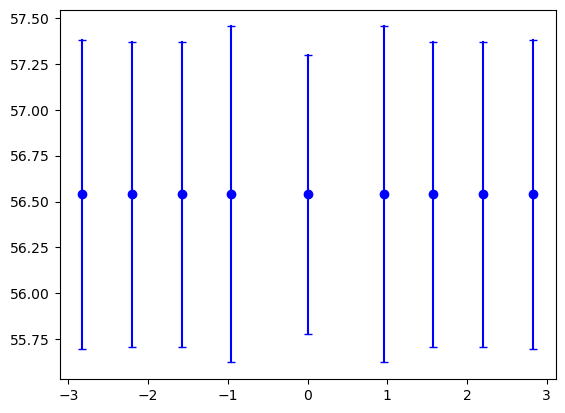

In [51]:
fig = plt.figure()
ax = fig.add_subplot()
phih_2_3=[]
Fuu_2_3=[]
Fuu_2_3_stat=[]
Fuu_2_3_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_2_3s = df_1xs_2_3[df_1xs_2_3['phih']>=i_phi_left][df_1xs_2_3['phih']<i_phi]['phih'].tolist()
    Fuu_2_3s = df_1xs_2_3[df_1xs_2_3['phih']>=i_phi_left][df_1xs_2_3['phih']<i_phi]['value'].tolist()
    Fuu_2_3_stats = df_1xs_2_3[df_1xs_2_3['phih']>=i_phi_left][df_1xs_2_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_2_3s))
    
    if len(phih_2_3s)>0:  
        #print('phih',phih_2_3s)
        #print('Fuu',Fuu_2_3s)
        #print('Fuu_stat',Fuu_2_3_stats)
        _Fuu_2_3 = Get_weighted_average(Fuu_2_3s,Fuu_2_3_stats)[0]
        _Fuu_2_3_stat = Get_weighted_average(Fuu_2_3s,Fuu_2_3_stats)[1]
        _phih_2_3= Get_weighted_average_phi(phih_2_3s,Fuu_2_3_stats)[0]
        #print('_Fuu_2_3',_Fuu_2_3)
        #print('_phih',_phih_2_3)
        #print('_Fuu_stat',_Fuu_2_3_stat)
        Fuu_2_3.append(_Fuu_2_3)
        phih_2_3.append(_phih_2_3)
        Fuu_2_3_stat.append(_Fuu_2_3_stat)
        Fuu_2_3_sys.append(Sys_table[1][2]*_Fuu_2_3)
        #print(Fuu_2_3,phih_2_3)
        ax.plot([_phih_2_3,_phih_2_3],[_Fuu_2_3-_Fuu_2_3_stat,_Fuu_2_3+_Fuu_2_3_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_2_3,Fuu_2_3,'bo')

-3.141592653589793 -2.5132741228718345
37
-2.5132741228718345 -1.8849555921538759
38
-1.8849555921538759 -1.2566370614359172
35
-1.2566370614359172 -0.6283185307179586
19
-0.6283185307179586 0.6283185307179586
16
0.6283185307179586 1.2566370614359172
19
1.2566370614359172 1.8849555921538759
35
1.8849555921538759 2.5132741228718345
38
2.5132741228718345 3.141592653589793
37


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/818043284.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_1s = df_1xs_3_1[df_1xs_3_1['phih']>=i_phi_left][df_1xs_3_1['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/818043284.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_1s = df_1xs_3_1[df_1xs_3_1['phih']>=i_phi_left][df_1xs_3_1['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/818043284.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_1_stats = df_1xs_3_1[df_1xs_3_1['phih']>=i_phi_left][df_1xs_3_1['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/818043284.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_1s = df_1xs_3_1[df_1xs_3_1['phih']>=i_phi_left][df_1xs_

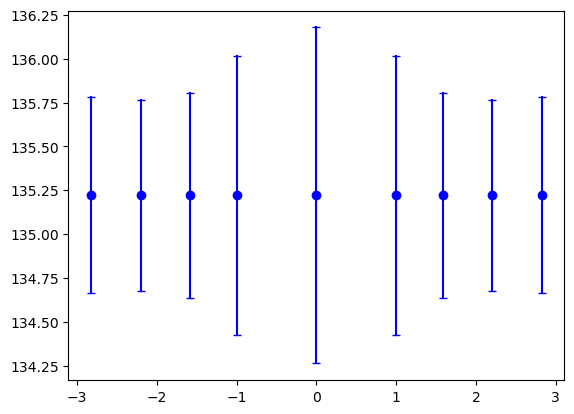

In [52]:
fig = plt.figure()
ax = fig.add_subplot()
phih_3_1=[]
Fuu_3_1=[]
Fuu_3_1_stat=[]
Fuu_3_1_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_3_1s = df_1xs_3_1[df_1xs_3_1['phih']>=i_phi_left][df_1xs_3_1['phih']<i_phi]['phih'].tolist()
    Fuu_3_1s = df_1xs_3_1[df_1xs_3_1['phih']>=i_phi_left][df_1xs_3_1['phih']<i_phi]['value'].tolist()
    Fuu_3_1_stats = df_1xs_3_1[df_1xs_3_1['phih']>=i_phi_left][df_1xs_3_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_3_1s))
    
    if len(phih_3_1s)>0:  
        #print('phih',phih_3_1s)
        #print('Fuu',Fuu_3_1s)
        #print('Fuu_stat',Fuu_3_1_stats)
        _Fuu_3_1 = Get_weighted_average(Fuu_3_1s,Fuu_3_1_stats)[0]
        _Fuu_3_1_stat = Get_weighted_average(Fuu_3_1s,Fuu_3_1_stats)[1]
        _phih_3_1= Get_weighted_average_phi(phih_3_1s,Fuu_3_1_stats)[0]
        #print('_Fuu_3_1',_Fuu_3_1)
        #print('_phih',_phih_3_1)
        #print('_Fuu_stat',_Fuu_3_1_stat)
        Fuu_3_1.append(_Fuu_3_1)
        phih_3_1.append(_phih_3_1)
        Fuu_3_1_stat.append(_Fuu_3_1_stat)
        Fuu_3_1_sys.append(Sys_table[2][0]*_Fuu_3_1)
        #print(Fuu_3_1,phih_3_1)
        ax.plot([_phih_3_1,_phih_3_1],[_Fuu_3_1-_Fuu_3_1_stat,_Fuu_3_1+_Fuu_3_1_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_3_1,Fuu_3_1,'bo')

-3.141592653589793 -2.5132741228718345
27
-2.5132741228718345 -1.8849555921538759
25
-1.8849555921538759 -1.2566370614359172
23
-1.2566370614359172 -0.6283185307179586
17
-0.6283185307179586 0.6283185307179586
20
0.6283185307179586 1.2566370614359172
17
1.2566370614359172 1.8849555921538759
21
1.8849555921538759 2.5132741228718345
26
2.5132741228718345 3.141592653589793
27


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3442591118.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_2s = df_1xs_3_2[df_1xs_3_2['phih']>=i_phi_left][df_1xs_3_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3442591118.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_2s = df_1xs_3_2[df_1xs_3_2['phih']>=i_phi_left][df_1xs_3_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3442591118.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_2_stats = df_1xs_3_2[df_1xs_3_2['phih']>=i_phi_left][df_1xs_3_2['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3442591118.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_2s = df_1xs_3_2[df_1xs_3_2['phih']>=i_phi_left][df_

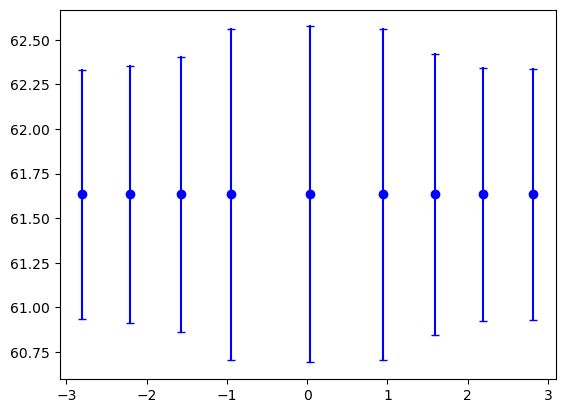

In [53]:
fig = plt.figure()
ax = fig.add_subplot()
phih_3_2=[]
Fuu_3_2=[]
Fuu_3_2_stat=[]
Fuu_3_2_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_3_2s = df_1xs_3_2[df_1xs_3_2['phih']>=i_phi_left][df_1xs_3_2['phih']<i_phi]['phih'].tolist()
    Fuu_3_2s = df_1xs_3_2[df_1xs_3_2['phih']>=i_phi_left][df_1xs_3_2['phih']<i_phi]['value'].tolist()
    Fuu_3_2_stats = df_1xs_3_2[df_1xs_3_2['phih']>=i_phi_left][df_1xs_3_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_3_2s))
    
    if len(phih_3_2s)>0:  
        #print('phih',phih_3_2s)
        #print('Fuu',Fuu_3_2s)
        #print('Fuu_stat',Fuu_3_2_stats)
        _Fuu_3_2 = Get_weighted_average(Fuu_3_2s,Fuu_3_2_stats)[0]
        _Fuu_3_2_stat = Get_weighted_average(Fuu_3_2s,Fuu_3_2_stats)[1]
        _phih_3_2= Get_weighted_average_phi(phih_3_2s,Fuu_3_2_stats)[0]
        #print('_Fuu_3_2',_Fuu_3_2)
        #print('_phih',_phih_3_2)
        #print('_Fuu_stat',_Fuu_3_2_stat)
        Fuu_3_2.append(_Fuu_3_2)
        phih_3_2.append(_phih_3_2)
        Fuu_3_2_stat.append(_Fuu_3_2_stat)
        Fuu_3_2_sys.append(Sys_table[2][1]*_Fuu_3_2)
        #print(Fuu_3_2,phih_3_2)
        ax.plot([_phih_3_2,_phih_3_2],[_Fuu_3_2-_Fuu_3_2_stat,_Fuu_3_2+_Fuu_3_2_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_3_2,Fuu_3_2,'bo')

-3.141592653589793 -2.5132741228718345
12
-2.5132741228718345 -1.8849555921538759
12
-1.8849555921538759 -1.2566370614359172
9
-1.2566370614359172 -0.6283185307179586
8
-0.6283185307179586 0.6283185307179586
8
0.6283185307179586 1.2566370614359172
8
1.2566370614359172 1.8849555921538759
9
1.8849555921538759 2.5132741228718345
12
2.5132741228718345 3.141592653589793
13


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/647871308.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_3s = df_1xs_3_3[df_1xs_3_3['phih']>=i_phi_left][df_1xs_3_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/647871308.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_3s = df_1xs_3_3[df_1xs_3_3['phih']>=i_phi_left][df_1xs_3_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/647871308.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_3_stats = df_1xs_3_3[df_1xs_3_3['phih']>=i_phi_left][df_1xs_3_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/647871308.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_3s = df_1xs_3_3[df_1xs_3_3['phih']>=i_phi_left][df_1xs_

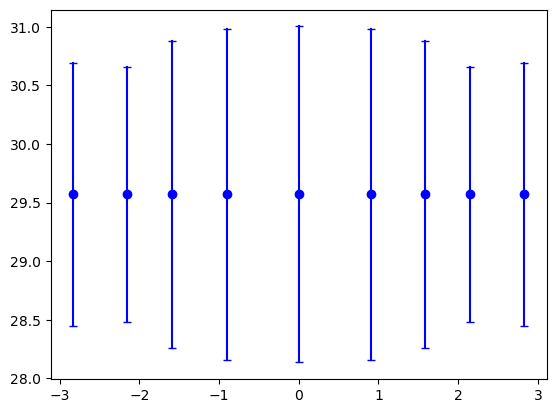

In [54]:
fig = plt.figure()
ax = fig.add_subplot()
phih_3_3=[]
Fuu_3_3=[]
Fuu_3_3_stat=[]
Fuu_3_3_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_3_3s = df_1xs_3_3[df_1xs_3_3['phih']>=i_phi_left][df_1xs_3_3['phih']<i_phi]['phih'].tolist()
    Fuu_3_3s = df_1xs_3_3[df_1xs_3_3['phih']>=i_phi_left][df_1xs_3_3['phih']<i_phi]['value'].tolist()
    Fuu_3_3_stats = df_1xs_3_3[df_1xs_3_3['phih']>=i_phi_left][df_1xs_3_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_3_3s))
    
    if len(phih_3_3s)>0:  
        #print('phih',phih_3_3s)
        #print('Fuu',Fuu_3_3s)
        #print('Fuu_stat',Fuu_3_3_stats)
        _Fuu_3_3 = Get_weighted_average(Fuu_3_3s,Fuu_3_3_stats)[0]
        _Fuu_3_3_stat = Get_weighted_average(Fuu_3_3s,Fuu_3_3_stats)[1]
        _phih_3_3= Get_weighted_average_phi(phih_3_3s,Fuu_3_3_stats)[0]
        #print('_Fuu_3_3',_Fuu_3_3)
        #print('_phih',_phih_3_3)
        #print('_Fuu_stat',_Fuu_3_3_stat)
        Fuu_3_3.append(_Fuu_3_3)
        phih_3_3.append(_phih_3_3)
        Fuu_3_3_stat.append(_Fuu_3_3_stat)
        Fuu_3_3_sys.append(Sys_table[2][2]*_Fuu_3_3)
        #print(Fuu_3_3,phih_3_3)
        ax.plot([_phih_3_3,_phih_3_3],[_Fuu_3_3-_Fuu_3_3_stat,_Fuu_3_3+_Fuu_3_3_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_3_3,Fuu_3_3,'bo')

-3.141592653589793 -2.5132741228718345
16
-2.5132741228718345 -1.8849555921538759
16
-1.8849555921538759 -1.2566370614359172
13
-1.2566370614359172 -0.6283185307179586
7
-0.6283185307179586 0.6283185307179586
1
0.6283185307179586 1.2566370614359172
7
1.2566370614359172 1.8849555921538759
13
1.8849555921538759 2.5132741228718345
16
2.5132741228718345 3.141592653589793
16


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2152064691.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_1s = df_1xs_4_1[df_1xs_4_1['phih']>=i_phi_left][df_1xs_4_1['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2152064691.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_1s = df_1xs_4_1[df_1xs_4_1['phih']>=i_phi_left][df_1xs_4_1['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2152064691.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_1_stats = df_1xs_4_1[df_1xs_4_1['phih']>=i_phi_left][df_1xs_4_1['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2152064691.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_1s = df_1xs_4_1[df_1xs_4_1['phih']>=i_phi_left][df_

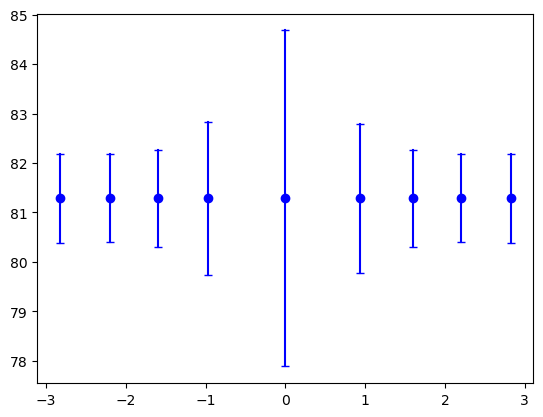

In [55]:
fig = plt.figure()
ax = fig.add_subplot()
phih_4_1=[]
Fuu_4_1=[]
Fuu_4_1_stat=[]
Fuu_4_1_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_4_1s = df_1xs_4_1[df_1xs_4_1['phih']>=i_phi_left][df_1xs_4_1['phih']<i_phi]['phih'].tolist()
    Fuu_4_1s = df_1xs_4_1[df_1xs_4_1['phih']>=i_phi_left][df_1xs_4_1['phih']<i_phi]['value'].tolist()
    Fuu_4_1_stats = df_1xs_4_1[df_1xs_4_1['phih']>=i_phi_left][df_1xs_4_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_4_1s))
    
    if len(phih_4_1s)>0:  
        #print('phih',phih_4_1s)
        #print('Fuu',Fuu_4_1s)
        #print('Fuu_stat',Fuu_4_1_stats)
        _Fuu_4_1 = Get_weighted_average(Fuu_4_1s,Fuu_4_1_stats)[0]
        _Fuu_4_1_stat = Get_weighted_average(Fuu_4_1s,Fuu_4_1_stats)[1]
        _phih_4_1= Get_weighted_average_phi(phih_4_1s,Fuu_4_1_stats)[0]
        #print('_Fuu_4_1',_Fuu_4_1)
        #print('_phih',_phih_4_1)
        #print('_Fuu_stat',_Fuu_4_1_stat)
        Fuu_4_1.append(_Fuu_4_1)
        phih_4_1.append(_phih_4_1)
        Fuu_4_1_stat.append(_Fuu_4_1_stat)
        Fuu_4_1_sys.append(Sys_table[3][0]*_Fuu_4_1)
        #print(Fuu_4_1,phih_4_1)
        ax.plot([_phih_4_1,_phih_4_1],[_Fuu_4_1-_Fuu_4_1_stat,_Fuu_4_1+_Fuu_4_1_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_4_1,Fuu_4_1,'bo')

-3.141592653589793 -2.5132741228718345
15
-2.5132741228718345 -1.8849555921538759
8
-1.8849555921538759 -1.2566370614359172
10
-1.2566370614359172 -0.6283185307179586
6
-0.6283185307179586 0.6283185307179586
3
0.6283185307179586 1.2566370614359172
3
1.2566370614359172 1.8849555921538759
7
1.8849555921538759 2.5132741228718345
12

/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1939581717.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_2s = df_1xs_4_2[df_1xs_4_2['phih']>=i_phi_left][df_1xs_4_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1939581717.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_2s = df_1xs_4_2[df_1xs_4_2['phih']>=i_phi_left][df_1xs_4_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1939581717.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_2_stats = df_1xs_4_2[df_1xs_4_2['phih']>=i_phi_left][df_1xs_4_2['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1939581717.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_2s = df_1xs_4_2[df_1xs_4_2['phih']>=i_phi_left][df_


2.5132741228718345 3.141592653589793
14


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1939581717.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_2s = df_1xs_4_2[df_1xs_4_2['phih']>=i_phi_left][df_1xs_4_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1939581717.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_2s = df_1xs_4_2[df_1xs_4_2['phih']>=i_phi_left][df_1xs_4_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1939581717.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_2_stats = df_1xs_4_2[df_1xs_4_2['phih']>=i_phi_left][df_1xs_4_2['phih']<i_phi]['stat'].tolist()


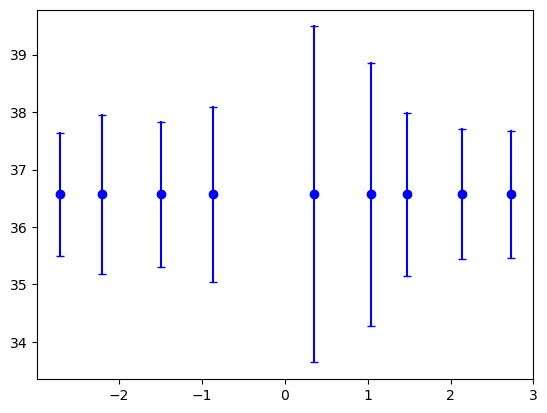

In [56]:
fig = plt.figure()
ax = fig.add_subplot()
phih_4_2=[]
Fuu_4_2=[]
Fuu_4_2_stat=[]
Fuu_4_2_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_4_2s = df_1xs_4_2[df_1xs_4_2['phih']>=i_phi_left][df_1xs_4_2['phih']<i_phi]['phih'].tolist()
    Fuu_4_2s = df_1xs_4_2[df_1xs_4_2['phih']>=i_phi_left][df_1xs_4_2['phih']<i_phi]['value'].tolist()
    Fuu_4_2_stats = df_1xs_4_2[df_1xs_4_2['phih']>=i_phi_left][df_1xs_4_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_4_2s))
    
    if len(phih_4_2s)>0:  
        #print('phih',phih_4_2s)
        #print('Fuu',Fuu_4_2s)
        #print('Fuu_stat',Fuu_4_2_stats)
        _Fuu_4_2 = Get_weighted_average(Fuu_4_2s,Fuu_4_2_stats)[0]
        _Fuu_4_2_stat = Get_weighted_average(Fuu_4_2s,Fuu_4_2_stats)[1]
        _phih_4_2= Get_weighted_average_phi(phih_4_2s,Fuu_4_2_stats)[0]
        #print('_Fuu_4_2',_Fuu_4_2)
        #print('_phih',_phih_4_2)
        #print('_Fuu_stat',_Fuu_4_2_stat)
        Fuu_4_2.append(_Fuu_4_2)
        phih_4_2.append(_phih_4_2)
        Fuu_4_2_stat.append(_Fuu_4_2_stat)
        Fuu_4_2_sys.append(Sys_table[3][1]*_Fuu_4_2)
        #print(Fuu_4_2,phih_4_2)
        ax.plot([_phih_4_2,_phih_4_2],[_Fuu_4_2-_Fuu_4_2_stat,_Fuu_4_2+_Fuu_4_2_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_4_2,Fuu_4_2,'bo')

-3.141592653589793 -2.5132741228718345
4
-2.5132741228718345 -1.8849555921538759
8


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2104906066.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_3s = df_1xs_4_3[df_1xs_4_3['phih']>=i_phi_left][df_1xs_4_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2104906066.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_3s = df_1xs_4_3[df_1xs_4_3['phih']>=i_phi_left][df_1xs_4_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2104906066.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_3_stats = df_1xs_4_3[df_1xs_4_3['phih']>=i_phi_left][df_1xs_4_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2104906066.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_3s = df_1xs_4_3[df_1xs_4_3['phih']>=i_phi_left][df_

-1.8849555921538759 -1.2566370614359172
4
-1.2566370614359172 -0.6283185307179586
0
-0.6283185307179586 0.6283185307179586
3
0.6283185307179586 1.2566370614359172
3
1.2566370614359172 1.8849555921538759
3
1.8849555921538759 2.5132741228718345
6
2.5132741228718345 3.141592653589793
5


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2104906066.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_3s = df_1xs_4_3[df_1xs_4_3['phih']>=i_phi_left][df_1xs_4_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2104906066.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_3s = df_1xs_4_3[df_1xs_4_3['phih']>=i_phi_left][df_1xs_4_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2104906066.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_3_stats = df_1xs_4_3[df_1xs_4_3['phih']>=i_phi_left][df_1xs_4_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2104906066.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_3s = df_1xs_4_3[df_1xs_4_3['phih']>=i_phi_left][df_

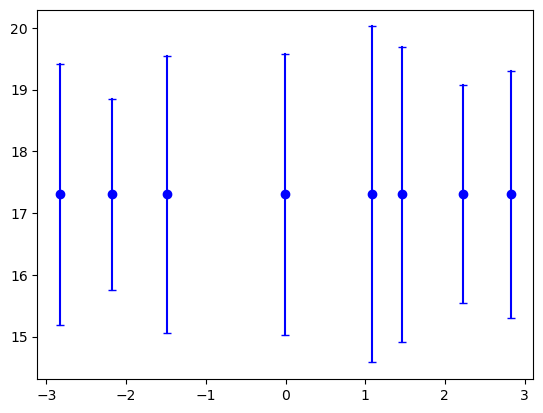

In [57]:
fig = plt.figure()
ax = fig.add_subplot()
phih_4_3=[]
Fuu_4_3=[]
Fuu_4_3_stat=[]
Fuu_4_3_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_4_3s = df_1xs_4_3[df_1xs_4_3['phih']>=i_phi_left][df_1xs_4_3['phih']<i_phi]['phih'].tolist()
    Fuu_4_3s = df_1xs_4_3[df_1xs_4_3['phih']>=i_phi_left][df_1xs_4_3['phih']<i_phi]['value'].tolist()
    Fuu_4_3_stats = df_1xs_4_3[df_1xs_4_3['phih']>=i_phi_left][df_1xs_4_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_4_3s))
    
    if len(phih_4_3s)>0:  
        #print('phih',phih_4_3s)
        #print('Fuu',Fuu_4_3s)
        #print('Fuu_stat',Fuu_4_3_stats)
        _Fuu_4_3 = Get_weighted_average(Fuu_4_3s,Fuu_4_3_stats)[0]
        _Fuu_4_3_stat = Get_weighted_average(Fuu_4_3s,Fuu_4_3_stats)[1]
        _phih_4_3= Get_weighted_average_phi(phih_4_3s,Fuu_4_3_stats)[0]
        #print('_Fuu_4_3',_Fuu_4_3)
        #print('_phih',_phih_4_3)
        #print('_Fuu_stat',_Fuu_4_3_stat)
        Fuu_4_3.append(_Fuu_4_3)
        phih_4_3.append(_phih_4_3)
        Fuu_4_3_stat.append(_Fuu_4_3_stat)
        Fuu_4_3_sys.append(Sys_table[3][2]*_Fuu_4_3)
        #print(Fuu_4_3,phih_4_3)
        ax.plot([_phih_4_3,_phih_4_3],[_Fuu_4_3-_Fuu_4_3_stat,_Fuu_4_3+_Fuu_4_3_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_4_3,Fuu_4_3,'bo')

-3.141592653589793 -2.5132741228718345


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1267002300.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_1s = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_1_1['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1267002300.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_1s = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_1_1['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1267002300.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_1_stats = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_1_1['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1267002300.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_1s = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_

39
_Fuu_1_1 588.6189888919791
_phih -2.8308097806802106
_Fuu_stat 0.9402593659756681
-2.5132741228718345 -1.8849555921538759
33
_Fuu_1_1 529.8938219809035
_phih -2.2143255119757224
_Fuu_stat 1.0206094886820047
-1.8849555921538759 -1.2566370614359172
22
_Fuu_1_1 426.18673756222586
_phih -1.615432240542432
_Fuu_stat 1.3294043765483248
-1.2566370614359172 -0.6283185307179586
9
_Fuu_1_1 327.36881936514334
_phih -0.9822691913303133
_Fuu_stat 2.4583330644461148
-0.6283185307179586 0.6283185307179586
2
_Fuu_1_1 419.8491295901608
_phih 0.0014374805415050345
_Fuu_stat 5.9672208758488985
0.6283185307179586 1.2566370614359172
9
_Fuu_1_1 321.5476765728756
_phih 0.9510172848810212
_Fuu_stat 2.4236981950318723
1.2566370614359172 1.8849555921538759
22
_Fuu_1_1 426.318013545039
_phih 1.6154858650120008
_Fuu_stat 1.3289746596258376
1.8849555921538759 2.5132741228718345
33
_Fuu_1_1 529.7209973837187
_phih 2.214210802823194
_Fuu_stat 1.0207742834654954
2.5132741228718345 3.141592653589793
39
_Fuu_1_1 588

Text(0, 0.5, '$F_{UU}$')

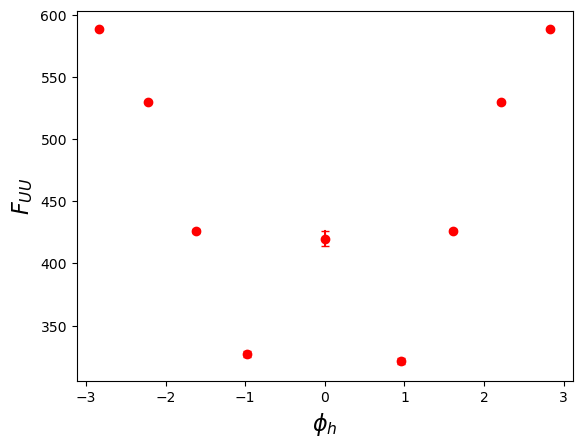

In [58]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_1_3xs=[]
Fuu_1_1_3xs=[]
Fuu_1_1_3xs_stat=[]
Fuu_1_1_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_1_1s = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_1_1['phih']<i_phi]['phih'].tolist()
    Fuu_1_1s = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_1_1['phih']<i_phi]['value'].tolist()
    Fuu_1_1_stats = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_1_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_1_1s))
    
    if len(phih_1_1s)>0:  
        #print('phih',phih_1_1s)
        #print('Fuu',Fuu_1_1s)
        #print('Fuu_stat',Fuu_1_1_stats)
        _Fuu_1_1 = Get_weighted_average(Fuu_1_1s,Fuu_1_1_stats)[0]
        _Fuu_1_1_stat = Factor_3xs*Get_weighted_average(Fuu_1_1s,Fuu_1_1_stats)[1]
        _phih_1_1= Get_weighted_average_phi(phih_1_1s,Fuu_1_1_stats)[0]
        
        print('_Fuu_1_1',_Fuu_1_1)
        print('_phih',_phih_1_1)
        print('_Fuu_stat',_Fuu_1_1_stat)
        Fuu_1_1_3xs.append(_Fuu_1_1)
        phih_1_1_3xs.append(_phih_1_1)
        Fuu_1_1_3xs_stat.append(_Fuu_1_1_stat)
        Fuu_1_1_3xs_sys.append(0.05*_Fuu_1_1)
        #print(Fuu_1_1,phih_1_1)
        ax.plot([_phih_1_1,_phih_1_1],[_Fuu_1_1-_Fuu_1_1_stat,_Fuu_1_1+_Fuu_1_1_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_1_1_3xs,Fuu_1_1_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)


-3.141592653589793 -2.5132741228718345
20
-2.5132741228718345 -1.8849555921538759
17
-1.8849555921538759 -1.2566370614359172
13
-1.2566370614359172 -0.6283185307179586
6
-0.6283185307179586 0.6283185307179586
3
0.6283185307179586 1.2566370614359172
5
1.2566370614359172 1.8849555921538759
12
1.8849555921538759 2.5132741228718345
17
2.5132741228718345 3.141592653589793
20


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2648398505.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_2s = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_1_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2648398505.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_2s = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_1_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2648398505.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_2_stats = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_1_2['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2648398505.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_2s = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_

Text(0, 0.5, '$F_{UU}$')

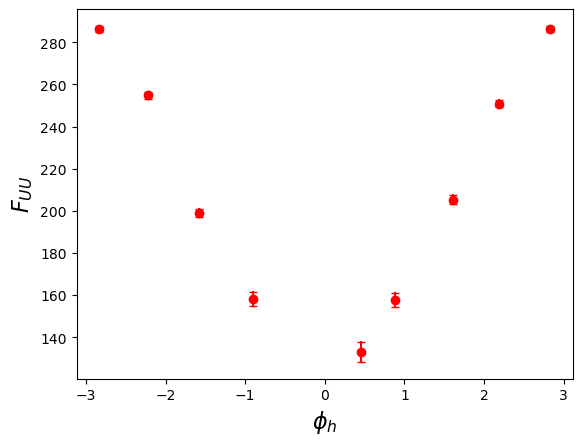

In [59]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_2_3xs=[]
Fuu_1_2_3xs=[]
Fuu_1_2_3xs_stat=[]
Fuu_1_2_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_1_2s = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_1_2['phih']<i_phi]['phih'].tolist()
    Fuu_1_2s = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_1_2['phih']<i_phi]['value'].tolist()
    Fuu_1_2_stats = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_1_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_1_2s))
    
    if len(phih_1_2s)>0:  
        #print('phih',phih_1_2s)
        #print('Fuu',Fuu_1_2s)
        #print('Fuu_stat',Fuu_1_2_stats)
        _Fuu_1_2 = Get_weighted_average(Fuu_1_2s,Fuu_1_2_stats)[0]
        _Fuu_1_2_stat = Factor_3xs*Get_weighted_average(Fuu_1_2s,Fuu_1_2_stats)[1]
        _phih_1_2= Get_weighted_average_phi(phih_1_2s,Fuu_1_2_stats)[0]
        #print('_Fuu_1_2',_Fuu_1_2)
        #print('_phih',_phih_1_2)
        #print('_Fuu_stat',_Fuu_1_2_stat)
        Fuu_1_2_3xs.append(_Fuu_1_2)
        phih_1_2_3xs.append(_phih_1_2)
        Fuu_1_2_3xs_stat.append(_Fuu_1_2_stat)
        Fuu_1_2_3xs_sys.append(0.05*_Fuu_1_2)
        #print(Fuu_1_2,phih_1_2)
        ax.plot([_phih_1_2,_phih_1_2],[_Fuu_1_2-_Fuu_1_2_stat,_Fuu_1_2+_Fuu_1_2_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_1_2_3xs,Fuu_1_2_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
12
-2.5132741228718345 -1.8849555921538759
7
-1.8849555921538759 -1.2566370614359172
7
-1.2566370614359172 -0.6283185307179586
3
-0.6283185307179586 0.6283185307179586
3
0.6283185307179586 1.2566370614359172
2
1.2566370614359172 1.8849555921538759
7
1.8849555921538759 2.5132741228718345
7
2.5132741228718345 3.141592653589793
11


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2872923745.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_3s = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_1_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2872923745.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_3s = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_1_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2872923745.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_3_stats = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_1_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/2872923745.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_3s = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_

Text(0, 0.5, '$F_{UU}$')

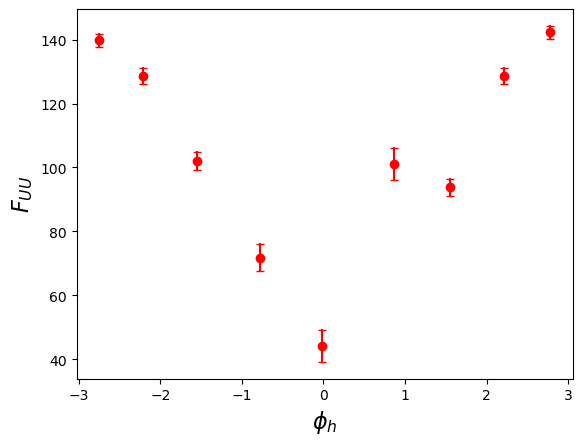

In [60]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_3_3xs=[]
Fuu_1_3_3xs=[]
Fuu_1_3_3xs_stat=[]
Fuu_1_3_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_1_3s = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_1_3['phih']<i_phi]['phih'].tolist()
    Fuu_1_3s = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_1_3['phih']<i_phi]['value'].tolist()
    Fuu_1_3_stats = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_1_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_1_3s))
    
    if len(phih_1_3s)>0:  
        #print('phih',phih_1_3s)
        #print('Fuu',Fuu_1_3s)
        #print('Fuu_stat',Fuu_1_3_stats)
        _Fuu_1_3 = Get_weighted_average(Fuu_1_3s,Fuu_1_3_stats)[0]
        _Fuu_1_3_stat = Factor_3xs*Get_weighted_average(Fuu_1_3s,Fuu_1_3_stats)[1]
        _phih_1_3= Get_weighted_average_phi(phih_1_3s,Fuu_1_3_stats)[0]
        #print('_Fuu_1_3',_Fuu_1_3)
        #print('_phih',_phih_1_3)
        #print('_Fuu_stat',_Fuu_1_3_stat)
        Fuu_1_3_3xs.append(_Fuu_1_3)
        phih_1_3_3xs.append(_phih_1_3)
        Fuu_1_3_3xs_stat.append(_Fuu_1_3_stat)
        Fuu_1_3_3xs_sys.append(0.05*_Fuu_1_3)
        #print(Fuu_1_3,phih_1_3)
        ax.plot([_phih_1_3,_phih_1_3],[_Fuu_1_3-_Fuu_1_3_stat,_Fuu_1_3+_Fuu_1_3_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_1_3_3xs,Fuu_1_3_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
40
-2.5132741228718345 -1.8849555921538759
40
-1.8849555921538759 -1.2566370614359172
42
-1.2566370614359172 -0.6283185307179586
32
-0.6283185307179586 0.6283185307179586
30
0.6283185307179586 1.2566370614359172
32
1.2566370614359172 1.8849555921538759
42
1.8849555921538759 2.5132741228718345
40
2.5132741228718345 3.141592653589793
40


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/295057374.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_1s = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/295057374.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_1s = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/295057374.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_1_stats = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/295057374.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_1s = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_

Text(0, 0.5, '$F_{UU}$')

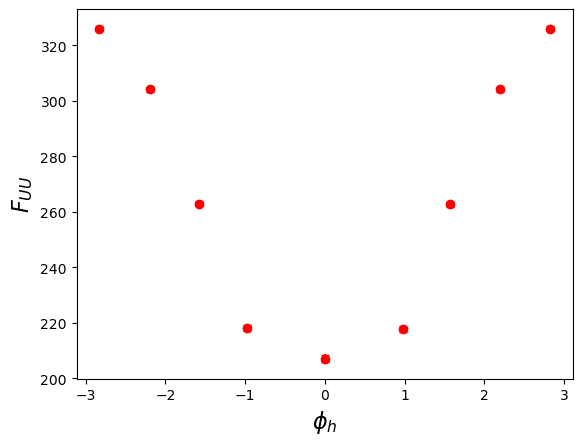

In [61]:
fig = plt.figure()
ax = fig.add_subplot()
phih_2_1_3xs=[]
Fuu_2_1_3xs=[]
Fuu_2_1_3xs_stat=[]
Fuu_2_1_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_2_1s = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1['phih']<i_phi]['phih'].tolist()
    Fuu_2_1s = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1['phih']<i_phi]['value'].tolist()
    Fuu_2_1_stats = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_2_1s))
    
    if len(phih_2_1s)>0:  
        #print('phih',phih_2_1s)
        #print('Fuu',Fuu_2_1s)
        #print('Fuu_stat',Fuu_2_1_stats)
        _Fuu_2_1 = Get_weighted_average(Fuu_2_1s,Fuu_2_1_stats)[0]
        _Fuu_2_1_stat = Factor_3xs*Get_weighted_average(Fuu_2_1s,Fuu_2_1_stats)[1]
        _phih_2_1= Get_weighted_average_phi(phih_2_1s,Fuu_2_1_stats)[0]
        #print('_Fuu_2_1',_Fuu_2_1)
        #print('_phih',_phih_2_1)
        #print('_Fuu_stat',_Fuu_2_1_stat)
        Fuu_2_1_3xs.append(_Fuu_2_1)
        phih_2_1_3xs.append(_phih_2_1)
        Fuu_2_1_3xs_stat.append(_Fuu_2_1_stat)
        Fuu_2_1_3xs_sys.append(0.05*_Fuu_2_1)
        #print(Fuu_2_1,phih_2_1)
        ax.plot([_phih_2_1,_phih_2_1],[_Fuu_2_1-_Fuu_2_1_stat,_Fuu_2_1+_Fuu_2_1_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_2_1_3xs,Fuu_2_1_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
23
-2.5132741228718345 -1.8849555921538759
23
-1.8849555921538759 -1.2566370614359172
24
-1.2566370614359172 -0.6283185307179586
19
-0.6283185307179586 0.6283185307179586
24
0.6283185307179586 1.2566370614359172
19
1.2566370614359172 1.8849555921538759
24
1.8849555921538759 2.5132741228718345
23
2.5132741228718345 3.141592653589793
23


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1806478085.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_2s = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_2_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1806478085.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_2s = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_2_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1806478085.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_2_stats = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_2_2['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/1806478085.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_2s = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_

Text(0, 0.5, '$F_{UU}$')

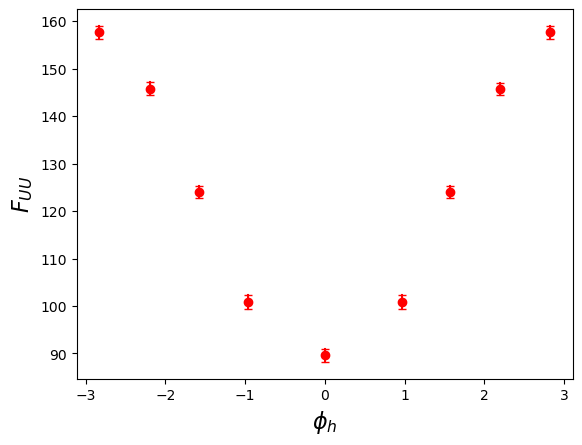

In [62]:
fig = plt.figure()
ax = fig.add_subplot()
phih_2_2_3xs=[]
Fuu_2_2_3xs=[]
Fuu_2_2_3xs_stat=[]
Fuu_2_2_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_2_2s = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_2_2['phih']<i_phi]['phih'].tolist()
    Fuu_2_2s = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_2_2['phih']<i_phi]['value'].tolist()
    Fuu_2_2_stats = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_2_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_2_2s))
    
    if len(phih_2_2s)>0:  
        #print('phih',phih_2_2s)
        #print('Fuu',Fuu_2_2s)
        #print('Fuu_stat',Fuu_2_2_stats)
        _Fuu_2_2 = Get_weighted_average(Fuu_2_2s,Fuu_2_2_stats)[0]
        _Fuu_2_2_stat = Factor_3xs*Get_weighted_average(Fuu_2_2s,Fuu_2_2_stats)[1]
        _phih_2_2= Get_weighted_average_phi(phih_2_2s,Fuu_2_2_stats)[0]
        #print('_Fuu_2_2',_Fuu_2_2)
        #print('_phih',_phih_2_2)
        #print('_Fuu_stat',_Fuu_2_2_stat)
        Fuu_2_2_3xs.append(_Fuu_2_2)
        phih_2_2_3xs.append(_phih_2_2)
        Fuu_2_2_3xs_stat.append(_Fuu_2_2_stat)
        Fuu_2_2_3xs_sys.append(0.05*_Fuu_2_2)
        #print(Fuu_2_2,phih_2_2)
        ax.plot([_phih_2_2,_phih_2_2],[_Fuu_2_2-_Fuu_2_2_stat,_Fuu_2_2+_Fuu_2_2_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_2_2_3xs,Fuu_2_2_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
13
-2.5132741228718345 -1.8849555921538759
13
-1.8849555921538759 -1.2566370614359172
13
-1.2566370614359172 -0.6283185307179586
11
-0.6283185307179586 0.6283185307179586
18
0.6283185307179586 1.2566370614359172
11
1.2566370614359172 1.8849555921538759
13
1.8849555921538759 2.5132741228718345
13
2.5132741228718345 3.141592653589793
13


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/4103060561.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_3s = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_2_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/4103060561.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_3s = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_2_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/4103060561.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_3_stats = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_2_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/4103060561.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_3s = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_

Text(0, 0.5, '$F_{UU}$')

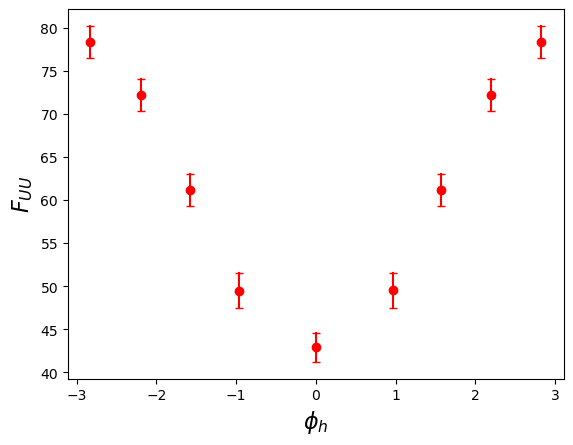

In [63]:
fig = plt.figure()
ax = fig.add_subplot()
phih_2_3_3xs=[]
Fuu_2_3_3xs=[]
Fuu_2_3_3xs_stat=[]
Fuu_2_3_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_2_3s = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_2_3['phih']<i_phi]['phih'].tolist()
    Fuu_2_3s = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_2_3['phih']<i_phi]['value'].tolist()
    Fuu_2_3_stats = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_2_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_2_3s))
    
    if len(phih_2_3s)>0:  
        #print('phih',phih_2_3s)
        #print('Fuu',Fuu_2_3s)
        #print('Fuu_stat',Fuu_2_3_stats)
        _Fuu_2_3 = Get_weighted_average(Fuu_2_3s,Fuu_2_3_stats)[0]
        _Fuu_2_3_stat = Factor_3xs*Get_weighted_average(Fuu_2_3s,Fuu_2_3_stats)[1]
        _phih_2_3= Get_weighted_average_phi(phih_2_3s,Fuu_2_3_stats)[0]
        #print('_Fuu_2_3',_Fuu_2_3)
        #print('_phih',_phih_2_3)
        #print('_Fuu_stat',_Fuu_2_3_stat)
        Fuu_2_3_3xs.append(_Fuu_2_3)
        phih_2_3_3xs.append(_phih_2_3)
        Fuu_2_3_3xs_stat.append(_Fuu_2_3_stat)
        Fuu_2_3_3xs_sys.append(0.05*_Fuu_2_3)
        #print(Fuu_2_3,phih_2_3)
        ax.plot([_phih_2_3,_phih_2_3],[_Fuu_2_3-_Fuu_2_3_stat,_Fuu_2_3+_Fuu_2_3_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_2_3_3xs,Fuu_2_3_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
37
-2.5132741228718345 -1.8849555921538759
38
-1.8849555921538759 -1.2566370614359172
35
-1.2566370614359172 -0.6283185307179586
19
-0.6283185307179586 0.6283185307179586
16
0.6283185307179586 1.2566370614359172
19
1.2566370614359172 1.8849555921538759
35
1.8849555921538759 2.5132741228718345
38
2.5132741228718345 3.141592653589793
37


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3716539223.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_1s = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_3_1['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3716539223.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_1s = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_3_1['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3716539223.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_1_stats = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_3_1['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3716539223.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_1s = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_

Text(0, 0.5, '$F_{UU}$')

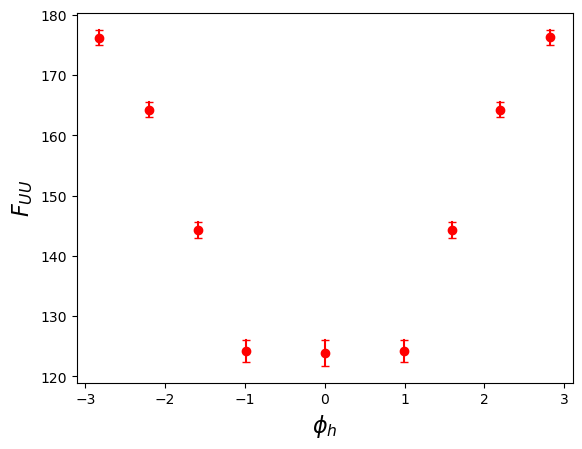

In [64]:
fig = plt.figure()
ax = fig.add_subplot()
phih_3_1_3xs=[]
Fuu_3_1_3xs=[]
Fuu_3_1_3xs_stat=[]
Fuu_3_1_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_3_1s = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_3_1['phih']<i_phi]['phih'].tolist()
    Fuu_3_1s = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_3_1['phih']<i_phi]['value'].tolist()
    Fuu_3_1_stats = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_3_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_3_1s))
    
    if len(phih_3_1s)>0:  
        #print('phih',phih_3_1s)
        #print('Fuu',Fuu_3_1s)
        #print('Fuu_stat',Fuu_3_1_stats)
        _Fuu_3_1 = Get_weighted_average(Fuu_3_1s,Fuu_3_1_stats)[0]
        _Fuu_3_1_stat = Factor_3xs*Get_weighted_average(Fuu_3_1s,Fuu_3_1_stats)[1]
        _phih_3_1= Get_weighted_average_phi(phih_3_1s,Fuu_3_1_stats)[0]
        #print('_Fuu_3_1',_Fuu_3_1)
        #print('_phih',_phih_3_1)
        #print('_Fuu_stat',_Fuu_3_1_stat)
        Fuu_3_1_3xs.append(_Fuu_3_1)
        phih_3_1_3xs.append(_phih_3_1)
        Fuu_3_1_3xs_stat.append(_Fuu_3_1_stat)
        Fuu_3_1_3xs_sys.append(0.05*_Fuu_3_1)
        #print(Fuu_3_1,phih_3_1)
        ax.plot([_phih_3_1,_phih_3_1],[_Fuu_3_1-_Fuu_3_1_stat,_Fuu_3_1+_Fuu_3_1_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_3_1_3xs,Fuu_3_1_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
20
-2.5132741228718345 -1.8849555921538759
19
-1.8849555921538759 -1.2566370614359172
17
-1.2566370614359172 -0.6283185307179586
11
-0.6283185307179586 0.6283185307179586
16
0.6283185307179586 1.2566370614359172
11
1.2566370614359172 1.8849555921538759
17
1.8849555921538759 2.5132741228718345
19
2.5132741228718345 3.141592653589793
20


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3194809815.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_2s = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_3_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3194809815.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_2s = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_3_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3194809815.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_2_stats = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_3_2['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/3194809815.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_2s = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_

Text(0, 0.5, '$F_{UU}$')

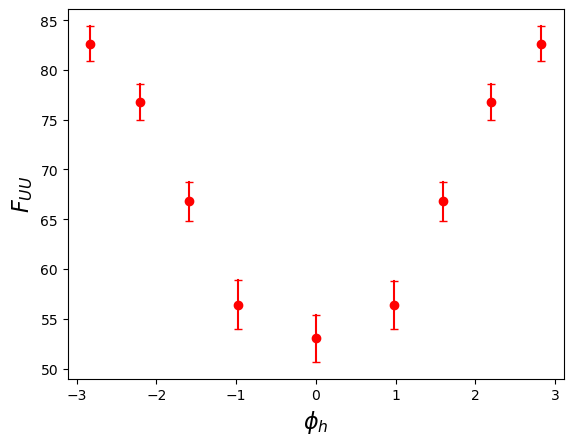

In [65]:
fig = plt.figure()
ax = fig.add_subplot()
phih_3_2_3xs=[]
Fuu_3_2_3xs=[]
Fuu_3_2_3xs_stat=[]
Fuu_3_2_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_3_2s = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_3_2['phih']<i_phi]['phih'].tolist()
    Fuu_3_2s = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_3_2['phih']<i_phi]['value'].tolist()
    Fuu_3_2_stats = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_3_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_3_2s))
    
    if len(phih_3_2s)>0:  
        #print('phih',phih_3_2s)
        #print('Fuu',Fuu_3_2s)
        #print('Fuu_stat',Fuu_3_2_stats)
        _Fuu_3_2 = Get_weighted_average(Fuu_3_2s,Fuu_3_2_stats)[0]
        _Fuu_3_2_stat = Factor_3xs*Get_weighted_average(Fuu_3_2s,Fuu_3_2_stats)[1]
        _phih_3_2= Get_weighted_average_phi(phih_3_2s,Fuu_3_2_stats)[0]
        #print('_Fuu_3_2',_Fuu_3_2)
        #print('_phih',_phih_3_2)
        #print('_Fuu_stat',_Fuu_3_2_stat)
        Fuu_3_2_3xs.append(_Fuu_3_2)
        phih_3_2_3xs.append(_phih_3_2)
        Fuu_3_2_3xs_stat.append(_Fuu_3_2_stat)
        Fuu_3_2_3xs_sys.append(0.05*_Fuu_3_2)
        #print(Fuu_3_2,phih_3_2)
        ax.plot([_phih_3_2,_phih_3_2],[_Fuu_3_2-_Fuu_3_2_stat,_Fuu_3_2+_Fuu_3_2_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_3_2_3xs,Fuu_3_2_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
12
-2.5132741228718345 -1.8849555921538759
12
-1.8849555921538759 -1.2566370614359172
9
-1.2566370614359172 -0.6283185307179586
8
-0.6283185307179586 0.6283185307179586
8
0.6283185307179586 1.2566370614359172
8
1.2566370614359172 1.8849555921538759
9
1.8849555921538759 2.5132741228718345
12
2.5132741228718345 3.141592653589793
13


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/805822727.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_3s = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/805822727.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_3s = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/805822727.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_3_stats = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/805822727.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_3s = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_

Text(0, 0.5, '$F_{UU}$')

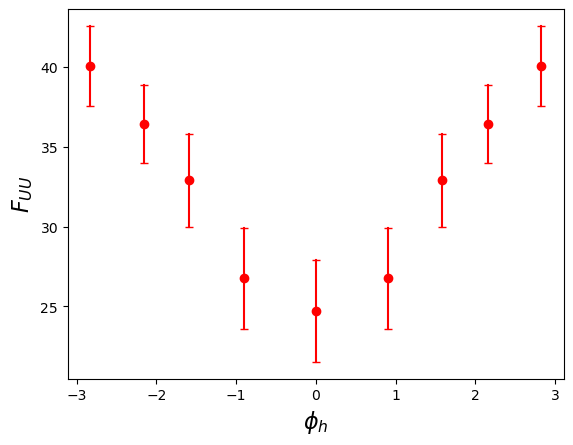

In [66]:
fig = plt.figure()
ax = fig.add_subplot()
phih_3_3_3xs=[]
Fuu_3_3_3xs=[]
Fuu_3_3_3xs_stat=[]
Fuu_3_3_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_3_3s = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3['phih']<i_phi]['phih'].tolist()
    Fuu_3_3s = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3['phih']<i_phi]['value'].tolist()
    Fuu_3_3_stats = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_3_3s))
    
    if len(phih_3_3s)>0:  
        #print('phih',phih_3_3s)
        #print('Fuu',Fuu_3_3s)
        #print('Fuu_stat',Fuu_3_3_stats)
        _Fuu_3_3 = Get_weighted_average(Fuu_3_3s,Fuu_3_3_stats)[0]
        _Fuu_3_3_stat = Factor_3xs*Get_weighted_average(Fuu_3_3s,Fuu_3_3_stats)[1]
        _phih_3_3= Get_weighted_average_phi(phih_3_3s,Fuu_3_3_stats)[0]
        #print('_Fuu_3_3',_Fuu_3_3)
        #print('_phih',_phih_3_3)
        #print('_Fuu_stat',_Fuu_3_3_stat)
        Fuu_3_3_3xs.append(_Fuu_3_3)
        phih_3_3_3xs.append(_phih_3_3)
        Fuu_3_3_3xs_stat.append(_Fuu_3_3_stat)
        Fuu_3_3_3xs_sys.append(0.05*_Fuu_3_3)
        #print(Fuu_3_3,phih_3_3)
        ax.plot([_phih_3_3,_phih_3_3],[_Fuu_3_3-_Fuu_3_3_stat,_Fuu_3_3+_Fuu_3_3_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_3_3_3xs,Fuu_3_3_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
16
-2.5132741228718345 -1.8849555921538759
16
-1.8849555921538759 -1.2566370614359172
13
-1.2566370614359172 -0.6283185307179586
7
-0.6283185307179586 0.6283185307179586
1
0.6283185307179586 1.2566370614359172
7
1.2566370614359172 1.8849555921538759
13
1.8849555921538759 2.5132741228718345
16
2.5132741228718345 3.141592653589793
16


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/650790593.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_1s = df_3xs_4_1[df_3xs_4_1['phih']>=i_phi_left][df_3xs_4_1['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/650790593.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_1s = df_3xs_4_1[df_3xs_4_1['phih']>=i_phi_left][df_3xs_4_1['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/650790593.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_1_stats = df_3xs_4_1[df_3xs_4_1['phih']>=i_phi_left][df_3xs_4_1['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/650790593.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_1s = df_3xs_4_1[df_3xs_4_1['phih']>=i_phi_left][df_3xs_

Text(0, 0.5, '$F_{UU}$')

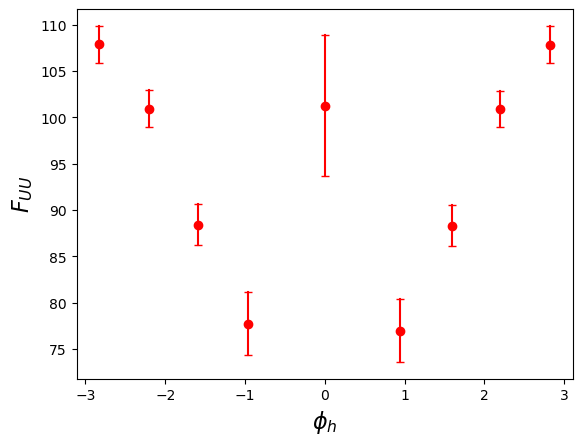

In [67]:
fig = plt.figure()
ax = fig.add_subplot()
phih_4_1_3xs=[]
Fuu_4_1_3xs=[]
Fuu_4_1_3xs_stat=[]
Fuu_4_1_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_4_1s = df_3xs_4_1[df_3xs_4_1['phih']>=i_phi_left][df_3xs_4_1['phih']<i_phi]['phih'].tolist()
    Fuu_4_1s = df_3xs_4_1[df_3xs_4_1['phih']>=i_phi_left][df_3xs_4_1['phih']<i_phi]['value'].tolist()
    Fuu_4_1_stats = df_3xs_4_1[df_3xs_4_1['phih']>=i_phi_left][df_3xs_4_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_4_1s))
    
    if len(phih_4_1s)>0:  
        #print('phih',phih_4_1s)
        #print('Fuu',Fuu_4_1s)
        #print('Fuu_stat',Fuu_4_1_stats)
        _Fuu_4_1 = Get_weighted_average(Fuu_4_1s,Fuu_4_1_stats)[0]
        _Fuu_4_1_stat = Factor_3xs*Get_weighted_average(Fuu_4_1s,Fuu_4_1_stats)[1]
        _phih_4_1= Get_weighted_average_phi(phih_4_1s,Fuu_4_1_stats)[0]
        #print('_Fuu_4_1',_Fuu_4_1)
        #print('_phih',_phih_4_1)
        #print('_Fuu_stat',_Fuu_4_1_stat)
        Fuu_4_1_3xs.append(_Fuu_4_1)
        phih_4_1_3xs.append(_phih_4_1)
        Fuu_4_1_3xs_stat.append(_Fuu_4_1_stat)
        Fuu_4_1_3xs_sys.append(0.05*_Fuu_4_1)
        #print(Fuu_4_1,phih_4_1)
        ax.plot([_phih_4_1,_phih_4_1],[_Fuu_4_1-_Fuu_4_1_stat,_Fuu_4_1+_Fuu_4_1_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_4_1_3xs,Fuu_4_1_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
11
-2.5132741228718345 -1.8849555921538759
8
-1.8849555921538759 -1.2566370614359172
7
-1.2566370614359172 -0.6283185307179586
4
-0.6283185307179586 0.6283185307179586
2
0.6283185307179586 1.2566370614359172
3
1.2566370614359172 1.8849555921538759
6
1.8849555921538759 2.5132741228718345
9
2.5132741228718345 3.141592653589793
11


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/697246916.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_2s = df_3xs_4_2[df_3xs_4_2['phih']>=i_phi_left][df_3xs_4_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/697246916.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_2s = df_3xs_4_2[df_3xs_4_2['phih']>=i_phi_left][df_3xs_4_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/697246916.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_2_stats = df_3xs_4_2[df_3xs_4_2['phih']>=i_phi_left][df_3xs_4_2['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/697246916.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_2s = df_3xs_4_2[df_3xs_4_2['phih']>=i_phi_left][df_3xs_

Text(0, 0.5, '$F_{UU}$')

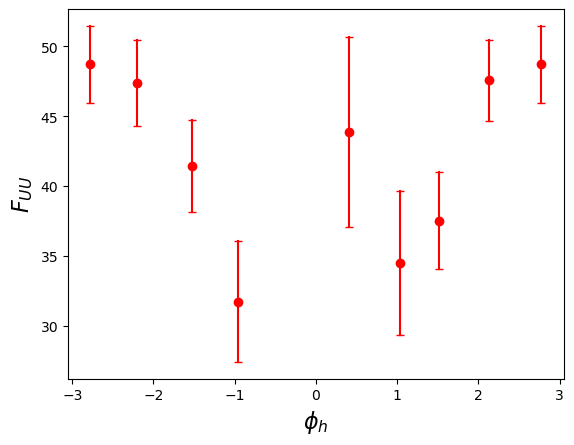

In [68]:
fig = plt.figure()
ax = fig.add_subplot()
phih_4_2_3xs=[]
Fuu_4_2_3xs=[]
Fuu_4_2_3xs_stat=[]
Fuu_4_2_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_4_2s = df_3xs_4_2[df_3xs_4_2['phih']>=i_phi_left][df_3xs_4_2['phih']<i_phi]['phih'].tolist()
    Fuu_4_2s = df_3xs_4_2[df_3xs_4_2['phih']>=i_phi_left][df_3xs_4_2['phih']<i_phi]['value'].tolist()
    Fuu_4_2_stats = df_3xs_4_2[df_3xs_4_2['phih']>=i_phi_left][df_3xs_4_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_4_2s))
    
    if len(phih_4_2s)>0:  
        #print('phih',phih_4_2s)
        #print('Fuu',Fuu_4_2s)
        #print('Fuu_stat',Fuu_4_2_stats)
        _Fuu_4_2 = Get_weighted_average(Fuu_4_2s,Fuu_4_2_stats)[0]
        _Fuu_4_2_stat = Factor_3xs*Get_weighted_average(Fuu_4_2s,Fuu_4_2_stats)[1]
        _phih_4_2= Get_weighted_average_phi(phih_4_2s,Fuu_4_2_stats)[0]
        #print('_Fuu_4_2',_Fuu_4_2)
        #print('_phih',_phih_4_2)
        #print('_Fuu_stat',_Fuu_4_2_stat)
        Fuu_4_2_3xs.append(_Fuu_4_2)
        phih_4_2_3xs.append(_phih_4_2)
        Fuu_4_2_3xs_stat.append(_Fuu_4_2_stat)
        Fuu_4_2_3xs_sys.append(0.05*_Fuu_4_2)
        #print(Fuu_4_2,phih_4_2)
        ax.plot([_phih_4_2,_phih_4_2],[_Fuu_4_2-_Fuu_4_2_stat,_Fuu_4_2+_Fuu_4_2_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_4_2_3xs,Fuu_4_2_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
4
-2.5132741228718345 -1.8849555921538759
8
-1.8849555921538759 -1.2566370614359172
4
-1.2566370614359172 -0.6283185307179586
0
-0.6283185307179586 0.6283185307179586
3
0.6283185307179586 1.2566370614359172
3
1.2566370614359172 1.8849555921538759
3
1.8849555921538759 2.5132741228718345
6
2.5132741228718345 3.141592653589793
5


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/879100309.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_3s = df_3xs_4_3[df_3xs_4_3['phih']>=i_phi_left][df_3xs_4_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/879100309.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_3s = df_3xs_4_3[df_3xs_4_3['phih']>=i_phi_left][df_3xs_4_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/879100309.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_3_stats = df_3xs_4_3[df_3xs_4_3['phih']>=i_phi_left][df_3xs_4_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_11007/879100309.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_3s = df_3xs_4_3[df_3xs_4_3['phih']>=i_phi_left][df_3xs_

Text(0, 0.5, '$F_{UU}$')

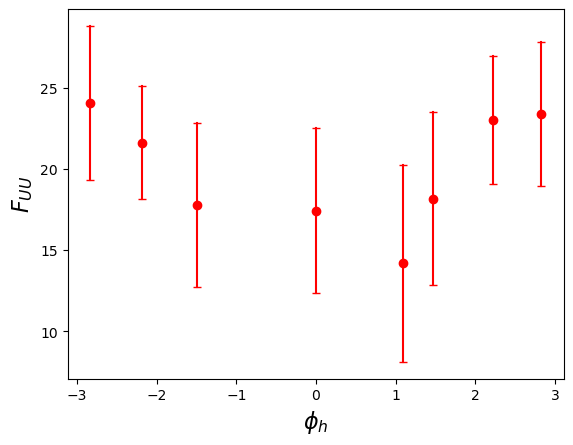

In [69]:
fig = plt.figure()
ax = fig.add_subplot()
phih_4_3_3xs=[]
Fuu_4_3_3xs=[]
Fuu_4_3_3xs_stat=[]
Fuu_4_3_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_4_3s = df_3xs_4_3[df_3xs_4_3['phih']>=i_phi_left][df_3xs_4_3['phih']<i_phi]['phih'].tolist()
    Fuu_4_3s = df_3xs_4_3[df_3xs_4_3['phih']>=i_phi_left][df_3xs_4_3['phih']<i_phi]['value'].tolist()
    Fuu_4_3_stats = df_3xs_4_3[df_3xs_4_3['phih']>=i_phi_left][df_3xs_4_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_4_3s))
    
    if len(phih_4_3s)>0:  
        #print('phih',phih_4_3s)
        #print('Fuu',Fuu_4_3s)
        #print('Fuu_stat',Fuu_4_3_stats)
        _Fuu_4_3 = Get_weighted_average(Fuu_4_3s,Fuu_4_3_stats)[0]
        _Fuu_4_3_stat = Factor_3xs*Get_weighted_average(Fuu_4_3s,Fuu_4_3_stats)[1]
        _phih_4_3= Get_weighted_average_phi(phih_4_3s,Fuu_4_3_stats)[0]
        #print('_Fuu_4_3',_Fuu_4_3)
        #print('_phih',_phih_4_3)
        #print('_Fuu_stat',_Fuu_4_3_stat)
        Fuu_4_3_3xs.append(_Fuu_4_3)
        phih_4_3_3xs.append(_phih_4_3)
        Fuu_4_3_3xs_stat.append(_Fuu_4_3_stat)
        Fuu_4_3_3xs_sys.append(0.05*_Fuu_4_3)
        #print(Fuu_4_3,phih_4_3)
        ax.plot([_phih_4_3,_phih_4_3],[_Fuu_4_3-_Fuu_4_3_stat,_Fuu_4_3+_Fuu_4_3_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_4_3_3xs,Fuu_4_3_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\\phi_h}$ [$nb/GeV^2$]')

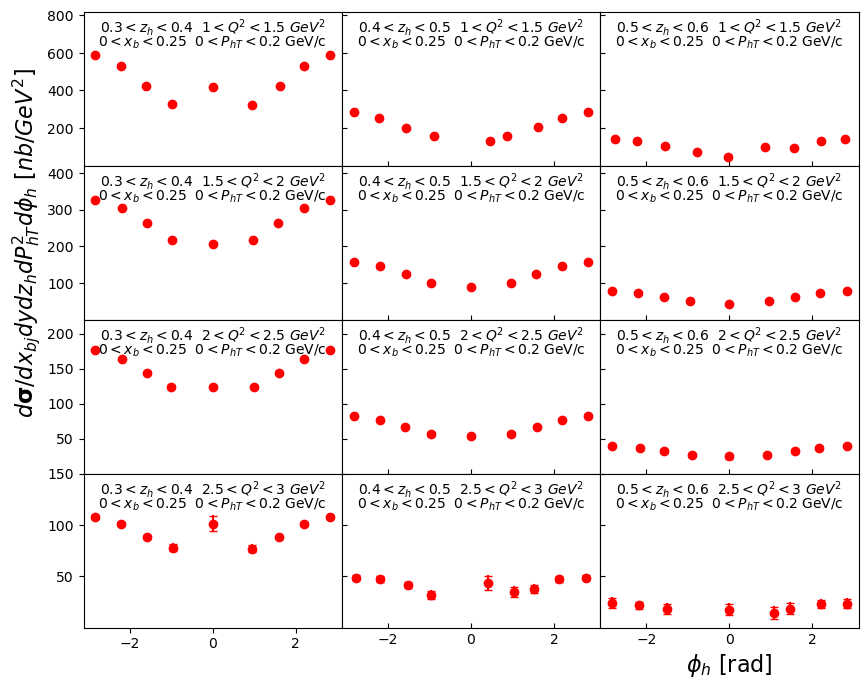

In [70]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

plt.xlabel('$\phi_h$ [rad]',fontsize=16)
#over large
Y_first_max=820;Y_second_max=420;Y_third_max=220;Y_fourth_max = 150
#Y_first_max=820;Y_second_max=420;Y_third_max=220;Y_fourth_max = 150
#Y_first_max=200;Y_second_max=100;Y_third_max=50;Y_fourth_max = 20
#large
#Y_first_max=0.18;Y_second_max=0.07;Y_third_max=0.024;Y_fourth_max = 0.012
#small2
#Y_first_max=0.04;Y_second_max=0.03;Y_third_max=0.02;Y_fourth_max = 0.012
#small
#Y_first_max=0.09;Y_second_max=0.04;Y_third_max=0.01;Y_fourth_max=0.006

for i_1_1_3xs in range(0,len(phih_1_1_3xs)):
    _phih_1_1 = phih_1_1_3xs[i_1_1_3xs]
    _Fuu_1_1 = Fuu_1_1_3xs[i_1_1_3xs]
    _Fuu_1_1_stat = Fuu_1_1_3xs_stat[i_1_1_3xs]
    axs[0][0].plot([_phih_1_1,_phih_1_1],[_Fuu_1_1-_Fuu_1_1_stat,_Fuu_1_1+_Fuu_1_1_stat],color='red',marker='_')
axs[0][0].plot(phih_1_1_3xs,Fuu_1_1_3xs,'ro')
#axs[0][0].fill_between(phih_1_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][0].set_ylim(0.0002,Y_first_max)
#axs[0][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
for i_1_2_3xs in range(0,len(phih_1_2_3xs)):
    _phih_1_2 = phih_1_2_3xs[i_1_2_3xs]
    _Fuu_1_2 = Fuu_1_2_3xs[i_1_2_3xs]
    _Fuu_1_2_stat = Fuu_1_2_3xs_stat[i_1_2_3xs]
    axs[0][1].plot([_phih_1_2,_phih_1_2],[_Fuu_1_2-_Fuu_1_2_stat,_Fuu_1_2+_Fuu_1_2_stat],color='red',marker='_')
axs[0][1].plot(phih_1_2_3xs,Fuu_1_2_3xs,'ro')
#axs[0][1].fill_between(phih_1_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][1].set_ylim(0.0002,Y_first_max)
axs[0][1].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
axs[0][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
for i_1_3_3xs in range(0,len(phih_1_3_3xs)):
    _phih_1_3 = phih_1_3_3xs[i_1_3_3xs]
    _Fuu_1_3 = Fuu_1_3_3xs[i_1_3_3xs]
    _Fuu_1_3_stat = Fuu_1_3_3xs_stat[i_1_3_3xs]
    axs[0][2].plot([_phih_1_3,_phih_1_3],[_Fuu_1_3-_Fuu_1_3_stat,_Fuu_1_3+_Fuu_1_3_stat],color='red',marker='_')
axs[0][2].plot(phih_1_3_3xs,Fuu_1_3_3xs,'ro')
#axs[0][2].fill_between(phih_1_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][2].set_ylim(0.0002,Y_first_max)
axs[0][2].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
axs[0][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
for i_2_1_3xs in range(0,len(phih_2_1_3xs)):
    _phih_2_1 = phih_2_1_3xs[i_2_1_3xs]
    _Fuu_2_1 = Fuu_2_1_3xs[i_2_1_3xs]
    _Fuu_2_1_stat = Fuu_2_1_3xs_stat[i_2_1_3xs]
    axs[1][0].plot([_phih_2_1,_phih_2_1],[_Fuu_2_1-_Fuu_2_1_stat,_Fuu_2_1+_Fuu_2_1_stat],color='red',marker='_')
axs[1][0].plot(phih_2_1_3xs,Fuu_2_1_3xs,'ro')
#axs[1][0].fill_between(phih_2_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][0].set_ylim(0.0002,Y_second_max)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
axs[1][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
for i_2_2_3xs in range(0,len(phih_2_2_3xs)):
    _phih_2_2 = phih_2_2_3xs[i_2_2_3xs]
    _Fuu_2_2 = Fuu_2_2_3xs[i_2_2_3xs]
    _Fuu_2_2_stat = Fuu_2_2_3xs_stat[i_2_2_3xs]
    axs[1][1].plot([_phih_2_2,_phih_2_2],[_Fuu_2_2-_Fuu_2_2_stat,_Fuu_2_2+_Fuu_2_2_stat],color='red',marker='_')
axs[1][1].plot(phih_2_2_3xs,Fuu_2_2_3xs,'ro')
#axs[1][1].fill_between(phih_2_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][1].set_ylim(0.0002,Y_second_max)
axs[1][1].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
axs[1][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
for i_2_3_3xs in range(0,len(phih_2_3_3xs)):
    _phih_2_3 = phih_2_3_3xs[i_2_3_3xs]
    _Fuu_2_3 = Fuu_2_3_3xs[i_2_3_3xs]
    _Fuu_2_3_stat = Fuu_2_3_3xs_stat[i_2_3_3xs]
    axs[1][2].plot([_phih_2_3,_phih_2_3],[_Fuu_2_3-_Fuu_2_3_stat,_Fuu_2_3+_Fuu_2_3_stat],color='red',marker='_')
axs[1][2].plot(phih_2_3_3xs,Fuu_2_3_3xs,'ro')
#axs[1][2].fill_between(phih_2_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][2].set_ylim(0.0002,Y_second_max)
axs[1][2].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
axs[1][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
for i_3_1_3xs in range(0,len(phih_3_1_3xs)):
    _phih_3_1 = phih_3_1_3xs[i_3_1_3xs]
    _Fuu_3_1 = Fuu_3_1_3xs[i_3_1_3xs]
    _Fuu_3_1_stat = Fuu_3_1_3xs_stat[i_3_1_3xs]
    axs[2][0].plot([_phih_3_1,_phih_3_1],[_Fuu_3_1-_Fuu_3_1_stat,_Fuu_3_1+_Fuu_3_1_stat],color='red',marker='_')
axs[2][0].plot(phih_3_1_3xs,Fuu_3_1_3xs,'ro')
#axs[2][0].fill_between(phih_3_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][0].set_ylim(0.0002,Y_third_max)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
axs[2][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
for i_3_2_3xs in range(0,len(phih_3_2_3xs)):
    _phih_3_2 = phih_3_2_3xs[i_3_2_3xs]
    _Fuu_3_2 = Fuu_3_2_3xs[i_3_2_3xs]
    _Fuu_3_2_stat = Fuu_3_2_3xs_stat[i_3_2_3xs]
    axs[2][1].plot([_phih_3_2,_phih_3_2],[_Fuu_3_2-_Fuu_3_2_stat,_Fuu_3_2+_Fuu_3_2_stat],color='red',marker='_')
axs[2][1].plot(phih_3_2_3xs,Fuu_3_2_3xs,'ro')
#axs[2][1].fill_between(phih_3_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][1].set_ylim(0.0002,Y_third_max)
axs[2][1].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
axs[2][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
for i_3_3_3xs in range(0,len(phih_3_3_3xs)):
    _phih_3_3 = phih_3_3_3xs[i_3_3_3xs]
    _Fuu_3_3 = Fuu_3_3_3xs[i_3_3_3xs]
    _Fuu_3_3_stat = Fuu_3_3_3xs_stat[i_3_3_3xs]
    axs[2][2].plot([_phih_3_3,_phih_3_3],[_Fuu_3_3-_Fuu_3_3_stat,_Fuu_3_3+_Fuu_3_3_stat],color='red',marker='_')
axs[2][2].plot(phih_3_3_3xs,Fuu_3_3_3xs,'ro')
#axs[2][2].fill_between(phih_3_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][2].set_ylim(0.0002,Y_third_max)
axs[2][2].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
axs[2][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
for i_4_1_3xs in range(0,len(phih_4_1_3xs)):
    _phih_4_1 = phih_4_1_3xs[i_4_1_3xs]
    _Fuu_4_1 = Fuu_4_1_3xs[i_4_1_3xs]
    _Fuu_4_1_stat = Fuu_4_1_3xs_stat[i_4_1_3xs]
    axs[3][0].plot([_phih_4_1,_phih_4_1],[_Fuu_4_1-_Fuu_4_1_stat,_Fuu_4_1+_Fuu_4_1_stat],color='red',marker='_')
axs[3][0].plot(phih_4_1_3xs,Fuu_4_1_3xs,'ro')
#axs[3][0].fill_between(phih_4_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][0].set_ylim(0.0002,Y_fourth_max)
#axs[3][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[3][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
axs[3][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
for i_4_2_3xs in range(0,len(phih_4_2_3xs)):
    _phih_4_2 = phih_4_2_3xs[i_4_2_3xs]
    _Fuu_4_2 = Fuu_4_2_3xs[i_4_2_3xs]
    _Fuu_4_2_stat = Fuu_4_2_3xs_stat[i_4_2_3xs]
    axs[3][1].plot([_phih_4_2,_phih_4_2],[_Fuu_4_2-_Fuu_4_2_stat,_Fuu_4_2+_Fuu_4_2_stat],color='red',marker='_')
axs[3][1].plot(phih_4_2_3xs,Fuu_4_2_3xs,'ro')
#axs[3][1].fill_between(phih_4_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][1].set_ylim(0.0002,Y_fourth_max)
axs[3][1].tick_params(direction='in',labelleft=False)
axs[3][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)
axs[3][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)

for i_4_3_3xs in range(0,len(phih_4_3_3xs)):
    _phih_4_3 = phih_4_3_3xs[i_4_3_3xs]
    _Fuu_4_3 = Fuu_4_3_3xs[i_4_3_3xs]
    _Fuu_4_3_stat = Fuu_4_3_3xs_stat[i_4_3_3xs]
    axs[3][2].plot([_phih_4_3,_phih_4_3],[_Fuu_4_3-_Fuu_4_3_stat,_Fuu_4_3+_Fuu_4_3_stat],color='red',marker='_')
axs[3][2].plot(phih_4_3_3xs,Fuu_4_3_3xs,'ro')
#axs[3][2].fill_between(phih_4_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][2].set_ylim(0.0002,Y_fourth_max)
axs[3][2].tick_params(direction='in',labelleft=False)
axs[3][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)
axs[3][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)

axs[1][0].set_ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)


#plt.show()
#plt.savefig('../Unpol_proposal/Materials/results/Fuu_large_PT1_pip.pdf')

In [71]:
from iminuit import Minuit

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

# display iminuit version
import iminuit
print("iminuit version:", iminuit.__version__)

#def Simple_fit(phi,A,B):
#    return A*(1-B*np.cos(phi))
#print(Simple_fit(0,1,2))
def Simple_fit(phi,A,B,C):
    return A*(1-B*np.cos(phi)-C*np.cos(2*phi))

iminuit version: 2.25.2


In [72]:
least_squares_1_1 = LeastSquares(df_3xs_1_1['phih'],Factor*df_3xs_1_1['value'],Factor*Factor_3xs*df_3xs_1_1['stat'],Simple_fit)
m_1_1 = Minuit(least_squares_1_1,A=0,B=0,C=0)
m_1_1.migrad()
m_1_1.hesse()



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.938e+04 (χ²/ndof = 289.7)│              Nfcn = 130              │
│ EDM = 5.81e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   431.5   │    0.9    │            │            │         │         │       │
│ 1 │ B    │   0.370   │   0.004   │            │            │         │         │       │
│ 2 │ C    │  -0.027   │   0.002   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │         A         B         C │
├───┼───────────────────────────────┤
│ A │     0.762 -3.146e-3 -1.122e-3 │
│ B │ -3.146e-3  1.54e-05      6e-6 │
│ C │ -1.122e-3      6e-6  4.13e-06 │
└───┴───────────────────────────────┘

In [73]:
least_squares_1_1_max = LeastSquares(df_3xs_1_1['phih'],Factor_max*df_3xs_1_1['value'],Factor*Factor_3xs*df_3xs_1_1['stat'],Simple_fit)
m_1_1_max = Minuit(least_squares_1_1_max,A=0,B=0,C=0)
m_1_1_max.migrad()
m_1_1_max.hesse()



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.185e+04 (χ²/ndof = 350.5)│              Nfcn = 130              │
│ EDM = 7.03e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   474.6   │    0.9    │            │            │         │         │       │
│ 1 │ B    │   0.370   │   0.004   │            │            │         │         │       │
│ 2 │ C    │  -0.0270  │  0.0018   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────────────────────────────┐
│   │          A          B          C │
├───┼──────────────────────────────────┤
│ A │      0.762  -2.860e-3 -1.0204e-3 │
│ B │  -2.860e-3   1.28e-05     4.8e-6 │
│ C │ -1.0204e-3     4.8e-6   3.41e-06 │
└───┴──────────────────────────────────┘

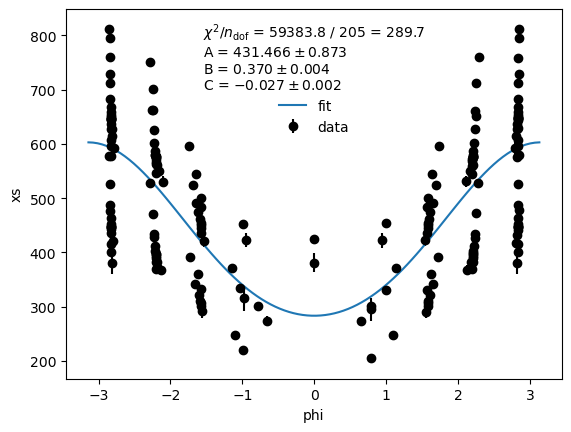

In [74]:
# draw data and fitted line
phi_bins = np.linspace(-3.14,3.13,100)
plt.errorbar(df_3xs_1_1['phih'],Factor*df_3xs_1_1['value'],Factor*Factor_3xs*df_3xs_1_1['stat'], fmt="ok", label="data")
plt.plot(phi_bins, Simple_fit(phi_bins, *m_1_1.values), label="fit")

# display legend with some fit info
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_1_1.fval:.1f} / {m_1_1.ndof:.0f} = {m_1_1.fmin.reduced_chi2:.1f}",
]
for p_1_1, v_1_1, e_1_1 in zip(m_1_1.parameters, m_1_1.values, m_1_1.errors):
    fit_info.append(f"{p_1_1} = ${v_1_1:.3f} \\pm {e_1_1:.3f}$")

plt.legend(title="\n".join(fit_info), frameon=False)
plt.xlabel("phi")
plt.ylabel("xs");


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\\phi_h}$ [$nb/GeV^2$]')

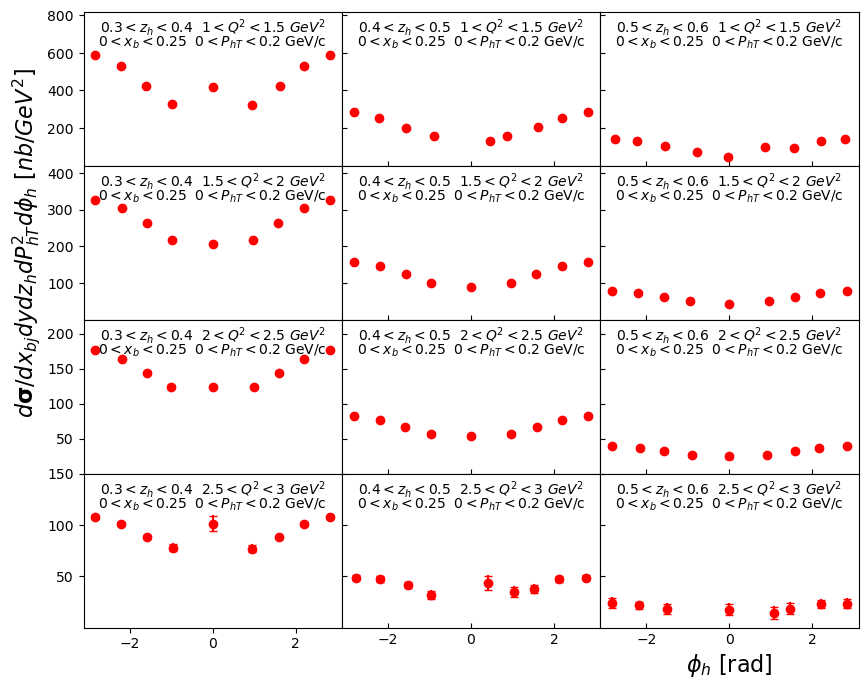

In [75]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

plt.xlabel('$\phi_h$ [rad]',fontsize=16)
#over large
Y_first_max=820;Y_second_max=420;Y_third_max=220;Y_fourth_max = 150
#Y_first_max=820;Y_second_max=420;Y_third_max=220;Y_fourth_max = 150
#Y_first_max=200;Y_second_max=100;Y_third_max=50;Y_fourth_max = 20
#large
#Y_first_max=0.18;Y_second_max=0.07;Y_third_max=0.024;Y_fourth_max = 0.012
#small2
#Y_first_max=0.04;Y_second_max=0.03;Y_third_max=0.02;Y_fourth_max = 0.012
#small
#Y_first_max=0.09;Y_second_max=0.04;Y_third_max=0.01;Y_fourth_max=0.006

for i_1_1_3xs in range(0,len(phih_1_1_3xs)):
    _phih_1_1 = phih_1_1_3xs[i_1_1_3xs]
    _Fuu_1_1 = Fuu_1_1_3xs[i_1_1_3xs]
    _Fuu_1_1_stat = Fuu_1_1_3xs_stat[i_1_1_3xs]
    axs[0][0].plot([_phih_1_1,_phih_1_1],[_Fuu_1_1-_Fuu_1_1_stat,_Fuu_1_1+_Fuu_1_1_stat],color='red',marker='_')
axs[0][0].plot(phih_1_1_3xs,Fuu_1_1_3xs,'ro')
#axs[0][0].fill_between(phih_1_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][0].set_ylim(0.0002,Y_first_max)
least_squares_1_1 = LeastSquares(df_3xs_1_1['phih'],Factor*df_3xs_1_1['value'],Factor*Factor_3xs*df_3xs_1_1['stat'],Simple_fit)
m_1_1 = Minuit(least_squares_1_1,A=0,B=0,C=0)
m_1_1.migrad()
m_1_1.hesse()
#axs[0][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
for i_1_2_3xs in range(0,len(phih_1_2_3xs)):
    _phih_1_2 = phih_1_2_3xs[i_1_2_3xs]
    _Fuu_1_2 = Fuu_1_2_3xs[i_1_2_3xs]
    _Fuu_1_2_stat = Fuu_1_2_3xs_stat[i_1_2_3xs]
    axs[0][1].plot([_phih_1_2,_phih_1_2],[_Fuu_1_2-_Fuu_1_2_stat,_Fuu_1_2+_Fuu_1_2_stat],color='red',marker='_')
axs[0][1].plot(phih_1_2_3xs,Fuu_1_2_3xs,'ro')
#axs[0][1].fill_between(phih_1_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][1].set_ylim(0.0002,Y_first_max)
axs[0][1].tick_params(direction='in',labelbottom=False,labelleft=False)
least_squares_1_2 = LeastSquares(df_3xs_1_2['phih'],Factor*df_3xs_1_2['value'],Factor*Factor_3xs*df_3xs_1_2['stat'],Simple_fit)
m_1_2 = Minuit(least_squares_1_2,A=0,B=0,C=0)
m_1_2.migrad()
m_1_2.hesse()
axs[0][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
axs[0][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
for i_1_3_3xs in range(0,len(phih_1_3_3xs)):
    _phih_1_3 = phih_1_3_3xs[i_1_3_3xs]
    _Fuu_1_3 = Fuu_1_3_3xs[i_1_3_3xs]
    _Fuu_1_3_stat = Fuu_1_3_3xs_stat[i_1_3_3xs]
    axs[0][2].plot([_phih_1_3,_phih_1_3],[_Fuu_1_3-_Fuu_1_3_stat,_Fuu_1_3+_Fuu_1_3_stat],color='red',marker='_')
axs[0][2].plot(phih_1_3_3xs,Fuu_1_3_3xs,'ro')
#axs[0][2].fill_between(phih_1_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][2].set_ylim(0.0002,Y_first_max)
axs[0][2].tick_params(direction='in',labelbottom=False,labelleft=False)
least_squares_1_3 = LeastSquares(df_3xs_1_3['phih'],Factor*df_3xs_1_3['value'],Factor*Factor_3xs*df_3xs_1_3['stat'],Simple_fit)
m_1_3 = Minuit(least_squares_1_3,A=0,B=0,C=0)
m_1_3.migrad()
m_1_3.hesse()
axs[0][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
axs[0][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
for i_2_1_3xs in range(0,len(phih_2_1_3xs)):
    _phih_2_1 = phih_2_1_3xs[i_2_1_3xs]
    _Fuu_2_1 = Fuu_2_1_3xs[i_2_1_3xs]
    _Fuu_2_1_stat = Fuu_2_1_3xs_stat[i_2_1_3xs]
    axs[1][0].plot([_phih_2_1,_phih_2_1],[_Fuu_2_1-_Fuu_2_1_stat,_Fuu_2_1+_Fuu_2_1_stat],color='red',marker='_')
axs[1][0].plot(phih_2_1_3xs,Fuu_2_1_3xs,'ro')
#axs[1][0].fill_between(phih_2_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][0].set_ylim(0.0002,Y_second_max)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
least_squares_2_1 = LeastSquares(df_3xs_2_1['phih'],Factor*df_3xs_2_1['value'],Factor*Factor_3xs*df_3xs_2_1['stat'],Simple_fit)
m_2_1 = Minuit(least_squares_2_1,A=0,B=0,C=0)
m_2_1.migrad()
m_2_1.hesse()
axs[1][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
axs[1][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
for i_2_2_3xs in range(0,len(phih_2_2_3xs)):
    _phih_2_2 = phih_2_2_3xs[i_2_2_3xs]
    _Fuu_2_2 = Fuu_2_2_3xs[i_2_2_3xs]
    _Fuu_2_2_stat = Fuu_2_2_3xs_stat[i_2_2_3xs]
    axs[1][1].plot([_phih_2_2,_phih_2_2],[_Fuu_2_2-_Fuu_2_2_stat,_Fuu_2_2+_Fuu_2_2_stat],color='red',marker='_')
axs[1][1].plot(phih_2_2_3xs,Fuu_2_2_3xs,'ro')
#axs[1][1].fill_between(phih_2_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][1].set_ylim(0.0002,Y_second_max)
axs[1][1].tick_params(direction='in',labelbottom=False,labelleft=False)
least_squares_2_2 = LeastSquares(df_3xs_2_2['phih'],Factor*df_3xs_2_2['value'],Factor*Factor_3xs*df_3xs_2_2['stat'],Simple_fit)
m_2_2 = Minuit(least_squares_2_2,A=0,B=0,C=0)
m_2_2.migrad()
m_2_2.hesse()
axs[1][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
axs[1][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
for i_2_3_3xs in range(0,len(phih_2_3_3xs)):
    _phih_2_3 = phih_2_3_3xs[i_2_3_3xs]
    _Fuu_2_3 = Fuu_2_3_3xs[i_2_3_3xs]
    _Fuu_2_3_stat = Fuu_2_3_3xs_stat[i_2_3_3xs]
    axs[1][2].plot([_phih_2_3,_phih_2_3],[_Fuu_2_3-_Fuu_2_3_stat,_Fuu_2_3+_Fuu_2_3_stat],color='red',marker='_')
axs[1][2].plot(phih_2_3_3xs,Fuu_2_3_3xs,'ro')
#axs[1][2].fill_between(phih_2_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][2].set_ylim(0.0002,Y_second_max)
axs[1][2].tick_params(direction='in',labelbottom=False,labelleft=False)
least_squares_2_3 = LeastSquares(df_3xs_2_3['phih'],Factor*df_3xs_2_3['value'],Factor*Factor_3xs*df_3xs_2_3['stat'],Simple_fit)
m_2_3 = Minuit(least_squares_2_3,A=0,B=0,C=0)
m_2_3.migrad()
m_2_3.hesse()
axs[1][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
axs[1][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
for i_3_1_3xs in range(0,len(phih_3_1_3xs)):
    _phih_3_1 = phih_3_1_3xs[i_3_1_3xs]
    _Fuu_3_1 = Fuu_3_1_3xs[i_3_1_3xs]
    _Fuu_3_1_stat = Fuu_3_1_3xs_stat[i_3_1_3xs]
    axs[2][0].plot([_phih_3_1,_phih_3_1],[_Fuu_3_1-_Fuu_3_1_stat,_Fuu_3_1+_Fuu_3_1_stat],color='red',marker='_')
axs[2][0].plot(phih_3_1_3xs,Fuu_3_1_3xs,'ro')
#axs[2][0].fill_between(phih_3_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][0].set_ylim(0.0002,Y_third_max)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
least_squares_3_1 = LeastSquares(df_3xs_3_1['phih'],Factor*df_3xs_3_1['value'],Factor*Factor_3xs*df_3xs_3_1['stat'],Simple_fit)
m_3_1 = Minuit(least_squares_3_1,A=0,B=0,C=0)
m_3_1.migrad()
m_3_1.hesse()
axs[2][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
axs[2][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
for i_3_2_3xs in range(0,len(phih_3_2_3xs)):
    _phih_3_2 = phih_3_2_3xs[i_3_2_3xs]
    _Fuu_3_2 = Fuu_3_2_3xs[i_3_2_3xs]
    _Fuu_3_2_stat = Fuu_3_2_3xs_stat[i_3_2_3xs]
    axs[2][1].plot([_phih_3_2,_phih_3_2],[_Fuu_3_2-_Fuu_3_2_stat,_Fuu_3_2+_Fuu_3_2_stat],color='red',marker='_')
axs[2][1].plot(phih_3_2_3xs,Fuu_3_2_3xs,'ro')
#axs[2][1].fill_between(phih_3_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][1].set_ylim(0.0002,Y_third_max)
axs[2][1].tick_params(direction='in',labelbottom=False,labelleft=False)
least_squares_3_2 = LeastSquares(df_3xs_3_2['phih'],Factor*df_3xs_3_2['value'],Factor*Factor_3xs*df_3xs_3_2['stat'],Simple_fit)
m_3_2 = Minuit(least_squares_3_2,A=0,B=0,C=0)
m_3_2.migrad()
m_3_2.hesse()
axs[2][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
axs[2][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
for i_3_3_3xs in range(0,len(phih_3_3_3xs)):
    _phih_3_3 = phih_3_3_3xs[i_3_3_3xs]
    _Fuu_3_3 = Fuu_3_3_3xs[i_3_3_3xs]
    _Fuu_3_3_stat = Fuu_3_3_3xs_stat[i_3_3_3xs]
    axs[2][2].plot([_phih_3_3,_phih_3_3],[_Fuu_3_3-_Fuu_3_3_stat,_Fuu_3_3+_Fuu_3_3_stat],color='red',marker='_')
axs[2][2].plot(phih_3_3_3xs,Fuu_3_3_3xs,'ro')
#axs[2][2].fill_between(phih_3_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][2].set_ylim(0.0002,Y_third_max)
axs[2][2].tick_params(direction='in',labelbottom=False,labelleft=False)
least_squares_3_3 = LeastSquares(df_3xs_3_3['phih'],Factor*df_3xs_3_3['value'],Factor*Factor_3xs*df_3xs_3_3['stat'],Simple_fit)
m_3_3 = Minuit(least_squares_3_3,A=0,B=0,C=0)
m_3_3.migrad()
m_3_3.hesse()
axs[2][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
axs[2][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
for i_4_1_3xs in range(0,len(phih_4_1_3xs)):
    _phih_4_1 = phih_4_1_3xs[i_4_1_3xs]
    _Fuu_4_1 = Fuu_4_1_3xs[i_4_1_3xs]
    _Fuu_4_1_stat = Fuu_4_1_3xs_stat[i_4_1_3xs]
    axs[3][0].plot([_phih_4_1,_phih_4_1],[_Fuu_4_1-_Fuu_4_1_stat,_Fuu_4_1+_Fuu_4_1_stat],color='red',marker='_')
axs[3][0].plot(phih_4_1_3xs,Fuu_4_1_3xs,'ro')
#axs[3][0].fill_between(phih_4_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][0].set_ylim(0.0002,Y_fourth_max)
#axs[3][0].tick_params(direction='in',labelbottom=False,labelleft=False)
least_squares_4_1 = LeastSquares(df_3xs_4_1['phih'],Factor*df_3xs_4_1['value'],Factor*Factor_3xs*df_3xs_4_1['stat'],Simple_fit)
m_4_1 = Minuit(least_squares_4_1,A=0,B=0,C=0)
m_4_1.migrad()
m_4_1.hesse()
axs[3][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
axs[3][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
for i_4_2_3xs in range(0,len(phih_4_2_3xs)):
    _phih_4_2 = phih_4_2_3xs[i_4_2_3xs]
    _Fuu_4_2 = Fuu_4_2_3xs[i_4_2_3xs]
    _Fuu_4_2_stat = Fuu_4_2_3xs_stat[i_4_2_3xs]
    axs[3][1].plot([_phih_4_2,_phih_4_2],[_Fuu_4_2-_Fuu_4_2_stat,_Fuu_4_2+_Fuu_4_2_stat],color='red',marker='_')
axs[3][1].plot(phih_4_2_3xs,Fuu_4_2_3xs,'ro')
#axs[3][1].fill_between(phih_4_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][1].set_ylim(0.0002,Y_fourth_max)
axs[3][1].tick_params(direction='in',labelleft=False)
least_squares_4_2 = LeastSquares(df_3xs_4_2['phih'],Factor*df_3xs_4_2['value'],Factor*Factor_3xs*df_3xs_4_2['stat'],Simple_fit)
m_4_2 = Minuit(least_squares_4_2,A=0,B=0,C=0)
m_4_2.migrad()
m_4_2.hesse()
axs[3][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)
axs[3][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)

for i_4_3_3xs in range(0,len(phih_4_3_3xs)):
    _phih_4_3 = phih_4_3_3xs[i_4_3_3xs]
    _Fuu_4_3 = Fuu_4_3_3xs[i_4_3_3xs]
    _Fuu_4_3_stat = Fuu_4_3_3xs_stat[i_4_3_3xs]
    axs[3][2].plot([_phih_4_3,_phih_4_3],[_Fuu_4_3-_Fuu_4_3_stat,_Fuu_4_3+_Fuu_4_3_stat],color='red',marker='_')
axs[3][2].plot(phih_4_3_3xs,Fuu_4_3_3xs,'ro')
#axs[3][2].fill_between(phih_4_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][2].set_ylim(0.0002,Y_fourth_max)
axs[3][2].tick_params(direction='in',labelleft=False)
least_squares_4_3 = LeastSquares(df_3xs_4_3['phih'],Factor*df_3xs_4_3['value'],Factor*Factor_3xs*df_3xs_4_3['stat'],Simple_fit)
m_4_3 = Minuit(least_squares_4_3,A=0,B=0,C=0)
m_4_3.migrad()
m_4_3.hesse()
axs[3][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)
axs[3][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)

axs[1][0].set_ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)


#plt.show()
#plt.savefig('../Unpol_proposal/Materials/results/Fuu_large_PT1_pip.pdf')

In [76]:

pim_least_squares_1_1 = LeastSquares(df_3xspim_1_1['phih'],Factor*df_3xspim_1_1['value'],Factor*Factor_3xspim*df_3xspim_1_1['stat'],Simple_fit)
pim_m_1_1 = Minuit(pim_least_squares_1_1,A=0,B=0,C=0)
pim_m_1_1.migrad()
pim_m_1_1.hesse()

pim_least_squares_1_2 = LeastSquares(df_3xspim_1_2['phih'],Factor*df_3xspim_1_2['value'],Factor*Factor_3xspim*df_3xspim_1_2['stat'],Simple_fit)
pim_m_1_2 = Minuit(pim_least_squares_1_2,A=0,B=0,C=0)
pim_m_1_2.migrad()
pim_m_1_2.hesse()

pim_least_squares_1_3 = LeastSquares(df_3xspim_1_3['phih'],Factor*df_3xspim_1_3['value'],Factor*Factor_3xspim*df_3xspim_1_3['stat'],Simple_fit)
pim_m_1_3 = Minuit(pim_least_squares_1_3,A=0,B=0,C=0)
pim_m_1_3.migrad()
pim_m_1_3.hesse()

pim_least_squares_2_1 = LeastSquares(df_3xspim_2_1['phih'],Factor*df_3xspim_2_1['value'],Factor*Factor_3xspim*df_3xspim_2_1['stat'],Simple_fit)
pim_m_2_1 = Minuit(pim_least_squares_2_1,A=0,B=0,C=0)
pim_m_2_1.migrad()
pim_m_2_1.hesse()

pim_least_squares_2_2 = LeastSquares(df_3xspim_2_2['phih'],Factor*df_3xspim_2_2['value'],Factor*Factor_3xspim*df_3xspim_2_2['stat'],Simple_fit)
pim_m_2_2 = Minuit(pim_least_squares_2_2,A=0,B=0,C=0)
pim_m_2_2.migrad()
pim_m_2_2.hesse()

pim_least_squares_2_3 = LeastSquares(df_3xspim_2_3['phih'],Factor*df_3xspim_2_3['value'],Factor*Factor_3xspim*df_3xspim_2_3['stat'],Simple_fit)
pim_m_2_3 = Minuit(pim_least_squares_2_3,A=0,B=0,C=0)
pim_m_2_3.migrad()
pim_m_2_3.hesse()

pim_least_squares_3_1 = LeastSquares(df_3xspim_3_1['phih'],Factor*df_3xspim_3_1['value'],Factor*Factor_3xspim*df_3xspim_3_1['stat'],Simple_fit)
pim_m_3_1 = Minuit(pim_least_squares_3_1,A=0,B=0,C=0)
pim_m_3_1.migrad()
pim_m_3_1.hesse()

pim_least_squares_3_2 = LeastSquares(df_3xspim_3_2['phih'],Factor*df_3xspim_3_2['value'],Factor*Factor_3xspim*df_3xspim_3_2['stat'],Simple_fit)
pim_m_3_2 = Minuit(pim_least_squares_3_2,A=0,B=0,C=0)
pim_m_3_2.migrad()
pim_m_3_2.hesse()

pim_least_squares_3_3 = LeastSquares(df_3xspim_3_3['phih'],Factor*df_3xspim_3_3['value'],Factor*Factor_3xspim*df_3xspim_3_3['stat'],Simple_fit)
pim_m_3_3 = Minuit(pim_least_squares_3_3,A=0,B=0,C=0)
pim_m_3_3.migrad()
pim_m_3_3.hesse()

pim_least_squares_4_1 = LeastSquares(df_3xspim_4_1['phih'],Factor*df_3xspim_4_1['value'],Factor*Factor_3xspim*df_3xspim_4_1['stat'],Simple_fit)
pim_m_4_1 = Minuit(pim_least_squares_4_1,A=0,B=0,C=0)
pim_m_4_1.migrad()
pim_m_4_1.hesse()

pim_least_squares_4_2 = LeastSquares(df_3xspim_4_2['phih'],Factor*df_3xspim_4_2['value'],Factor*Factor_3xspim*df_3xspim_4_2['stat'],Simple_fit)
pim_m_4_2 = Minuit(pim_least_squares_4_2,A=0,B=0,C=0)
pim_m_4_2.migrad()
pim_m_4_2.hesse()

pim_least_squares_4_3 = LeastSquares(df_3xspim_4_3['phih'],Factor*df_3xspim_4_3['value'],Factor*Factor_3xspim*df_3xspim_4_3['stat'],Simple_fit)
pim_m_4_3 = Minuit(pim_least_squares_4_3,A=0,B=0,C=0)
pim_m_4_3.migrad()
pim_m_4_3.hesse()


#plt.show()
#plt.savefig('../Unpol_proposal/Materials/results/Fuu_large_PT1_pip.pdf')

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.568 (χ²/ndof = 0.2)      │              Nfcn = 101              │
│ EDM = 4.59e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   18.2    │    1.5    │            │            │         │         │       │
│ 1 │ B    │   0.25    │   0.13    │            │            │         │         │       │
│ 2 │ C    │   -0.03   │   0.11    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────────────────┐
│   │      A      B      C │
├───┼──────────────────────┤
│ A │   2.18 -0.115 -0.033 │
│ B │ -0.115 0.0174  0.004 │
│ C │ -0.033  0.004 0.0118 │
└───┴──────────────────────┘

In [77]:
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_1_1.fval:.1f} / {m_1_1.ndof:.0f} = {m_1_1.fmin.reduced_chi2:.1f}",
]
for p_1_1, v_1_1, e_1_1 in zip(m_1_1.parameters, m_1_1.values, m_1_1.errors):
    fit_info.append(f"{p_1_1} = ${v_1_1:.3f} \\pm {e_1_1:.3f}$")
print("for 1 1", fit_info)

for 1 1 ['$\\chi^2$/$n_\\mathrm{dof}$ = 59383.8 / 205 = 289.7', 'A = $431.466 \\pm 0.873$', 'B = $0.370 \\pm 0.004$', 'C = $-0.027 \\pm 0.002$']


In [78]:
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_1_2.fval:.1f} / {m_1_2.ndof:.0f} = {m_1_2.fmin.reduced_chi2:.1f}",
]
for p_1_2, v_1_2, e_1_2 in zip(m_1_2.parameters, m_1_2.values, m_1_2.errors):
    fit_info.append(f"{p_1_2} = ${v_1_2:.3f} \\pm {e_1_2:.3f}$")
print("for 1 1", fit_info)

for 1 1 ['$\\chi^2$/$n_\\mathrm{dof}$ = 5998.1 / 110 = 54.5', 'A = $206.887 \\pm 1.030$', 'B = $0.381 \\pm 0.009$', 'C = $-0.039 \\pm 0.006$']


In [79]:
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_1_3.fval:.1f} / {m_1_3.ndof:.0f} = {m_1_3.fmin.reduced_chi2:.1f}",
]
for p_1_3, v_1_3, e_1_3 in zip(m_1_3.parameters, m_1_3.values, m_1_3.errors):
    fit_info.append(f"{p_1_3} = ${v_1_3:.3f} \\pm {e_1_3:.3f}$")
print("for 1 1", fit_info)

for 1 1 ['$\\chi^2$/$n_\\mathrm{dof}$ = 624.1 / 56 = 11.1', 'A = $101.785 \\pm 1.201$', 'B = $0.415 \\pm 0.021$', 'C = $-0.011 \\pm 0.015$']


In [80]:
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_4_3.fval:.1f} / {m_4_3.ndof:.0f} = {m_4_3.fmin.reduced_chi2:.1f}",
]
for p_4_3, v_4_3, e_4_3 in zip(m_4_3.parameters, m_4_3.values, m_4_3.errors):
    fit_info.append(f"{p_4_3} = ${v_4_3:.3f} \\pm {e_4_3:.3f}$")
print("for 4 3", fit_info)

for 4 3 ['$\\chi^2$/$n_\\mathrm{dof}$ = 4.9 / 33 = 0.1', 'A = $19.386 \\pm 1.820$', 'B = $0.230 \\pm 0.147$', 'C = $-0.062 \\pm 0.118$']


Text(0, 0.5, 'B')

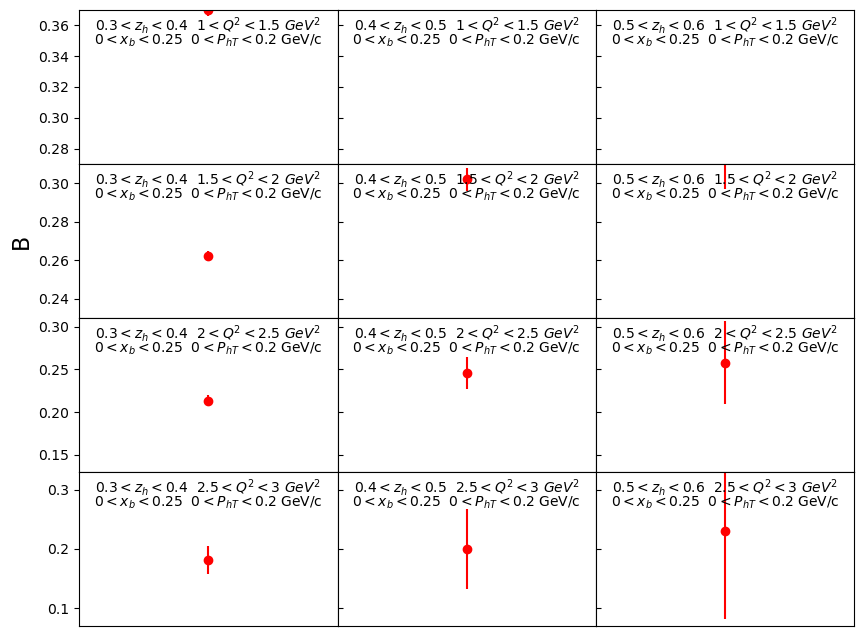

In [81]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

Bmin1 = 0.27 ;Bmin2 = 0.23;Bmin3=0.13;Bmin4=0.07
Bmax1 = 0.37;Bmax2 = 0.31 ;Bmax3=0.31;Bmax4=0.33

axs[0][0].errorbar(-1,m_1_1.values[1],m_1_1.errors[1],fmt='or')
axs[0][0].set_ylim(Bmin1,Bmax1)

axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)

axs[0][1].errorbar(-1,m_1_2.values[1],m_1_2.errors[1],fmt='or')
axs[0][1].set_ylim(Bmin1,Bmax1)

axs[0][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[0][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
axs[0][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)

axs[0][2].errorbar(-1,m_1_3.values[1],m_1_3.errors[1],fmt='or')
axs[0][2].set_ylim(Bmin1,Bmax1)

axs[0][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[0][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
axs[0][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)

axs[1][0].errorbar(-1,m_2_1.values[1],m_2_1.errors[1],fmt='or')
axs[1][0].set_ylim(Bmin2,Bmax2)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
axs[1][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)

axs[1][1].errorbar(-1,m_2_2.values[1],m_2_2.errors[1],fmt='or')
axs[1][1].set_ylim(Bmin2,Bmax2)

axs[1][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[1][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
axs[1][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)

axs[1][2].errorbar(-1,m_2_3.values[1],m_2_3.errors[1],fmt='or')
axs[1][2].set_ylim(Bmin2,Bmax2)

axs[1][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[1][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
axs[1][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)

axs[2][0].errorbar(-1,m_3_1.values[1],m_3_1.errors[1],fmt='or')
axs[2][0].set_ylim(Bmin3,Bmax3)

#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
axs[2][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)

axs[2][1].errorbar(-1,m_3_2.values[1],m_3_2.errors[1],fmt='or')
axs[2][1].set_ylim(Bmin3,Bmax3)

axs[2][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[2][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
axs[2][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)

axs[2][2].errorbar(-1,m_3_3.values[1],m_3_3.errors[1],fmt='or')
axs[2][2].set_ylim(Bmin3,Bmax3)

axs[2][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[2][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
axs[2][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)

axs[3][0].errorbar(-1,m_4_1.values[1],m_4_1.errors[1],fmt='or')
axs[3][0].set_ylim(Bmin4,Bmax4)

axs[3][0].tick_params(axis='x',direction='in',bottom=False,labelbottom=False)
axs[3][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
axs[3][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)

axs[3][1].errorbar(-1,m_4_2.values[1],m_4_2.errors[1],fmt='or')
axs[3][1].set_ylim(Bmin4,Bmax4)

axs[3][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[3][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)
axs[3][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)

axs[3][2].errorbar(-1,m_4_3.values[1],m_4_3.errors[1],fmt='or')
axs[3][2].set_ylim(Bmin4,Bmax4)

axs[3][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[3][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)
axs[3][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)

axs[1][0].set_ylabel(r'B',fontsize=16)


#plt.show()
#plt.savefig('../Unpol_proposal/Materials/results/Fuu_large_PT1_pip.pdf')

Text(0, 0.5, 'C')

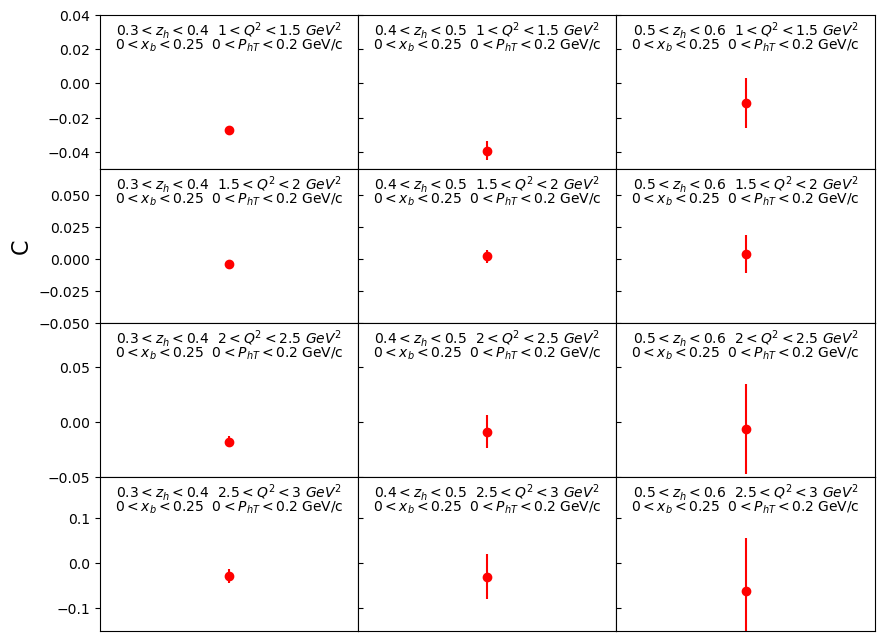

In [82]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

Cmin1 = -0.05 ;Cmin2 = -0.05;Cmin3=-0.05;Cmin4=-0.15
Cmax1 = 0.04;Cmax2 = 0.07 ;Cmax3=0.09;Cmax4=0.19

axs[0][0].errorbar(-1,m_1_1.values[2],m_1_1.errors[2],fmt='or')
axs[0][0].set_ylim(Cmin1,Cmax1)

axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)

axs[0][1].errorbar(-1,m_1_2.values[2],m_1_2.errors[2],fmt='or')
axs[0][1].set_ylim(Cmin1,Cmax1)

axs[0][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[0][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
axs[0][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)

axs[0][2].errorbar(-1,m_1_3.values[2],m_1_3.errors[2],fmt='or')
axs[0][2].set_ylim(Cmin1,Cmax1)

axs[0][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[0][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
axs[0][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)

axs[1][0].errorbar(-1,m_2_1.values[2],m_2_1.errors[2],fmt='or')
axs[1][0].set_ylim(Cmin2,Cmax2)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
axs[1][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)

axs[1][1].errorbar(-1,m_2_2.values[2],m_2_2.errors[2],fmt='or')
axs[1][1].set_ylim(Cmin2,Cmax2)

axs[1][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[1][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
axs[1][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)

axs[1][2].errorbar(-1,m_2_3.values[2],m_2_3.errors[2],fmt='or')
axs[1][2].set_ylim(Cmin2,Cmax2)

axs[1][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[1][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
axs[1][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)

axs[2][0].errorbar(-1,m_3_1.values[2],m_3_1.errors[2],fmt='or')
axs[2][0].set_ylim(Cmin3,Cmax3)

#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
axs[2][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)

axs[2][1].errorbar(-1,m_3_2.values[2],m_3_2.errors[2],fmt='or')
axs[2][1].set_ylim(Cmin3,Cmax3)

axs[2][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[2][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
axs[2][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)

axs[2][2].errorbar(-1,m_3_3.values[2],m_3_3.errors[2],fmt='or')
axs[2][2].set_ylim(Cmin3,Cmax3)

axs[2][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[2][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
axs[2][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)

axs[3][0].errorbar(-1,m_4_1.values[2],m_4_1.errors[2],fmt='or')
axs[3][0].set_ylim(Cmin4,Cmax4)

axs[3][0].tick_params(axis='x',direction='in',bottom=False,labelbottom=False)
axs[3][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
axs[3][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)

axs[3][1].errorbar(-1,m_4_2.values[2],m_4_2.errors[2],fmt='or')
axs[3][1].set_ylim(Cmin4,Cmax4)

axs[3][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[3][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)
axs[3][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)

axs[3][2].errorbar(-1,m_4_3.values[2],m_4_3.errors[2],fmt='or')
axs[3][2].set_ylim(Cmin4,Cmax4)

axs[3][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[3][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)
axs[3][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)

axs[1][0].set_ylabel(r'C',fontsize=16)


#plt.show()
#plt.savefig('../Unpol_proposal/Materials/results/Fuu_large_PT1_pip.pdf')

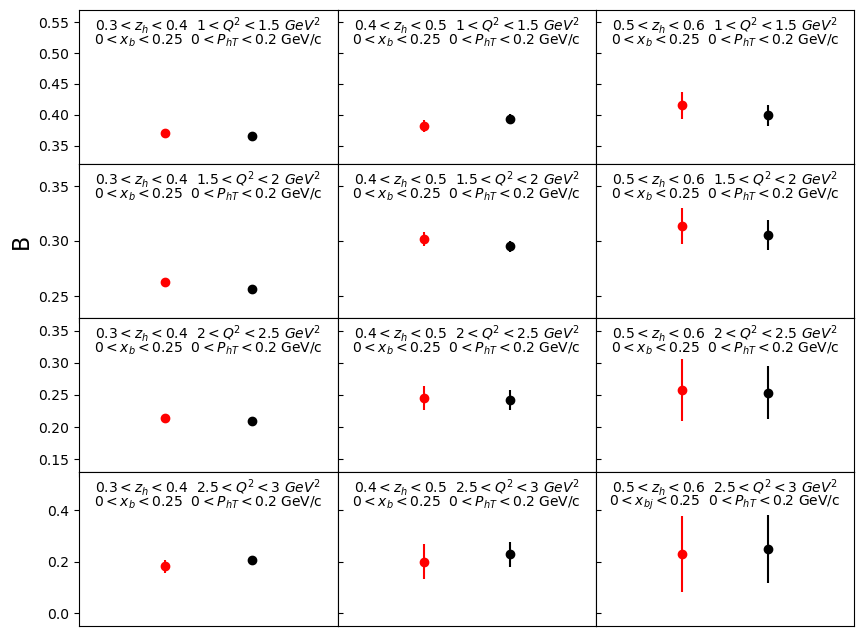

In [83]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
axs[0][0].set_xlim(-2,1)

Bmin1 = 0.32 ;Bmin2 = 0.23;Bmin3=0.13;Bmin4=-0.05
Bmax1 = 0.57;Bmax2 = 0.37 ;Bmax3=0.37;Bmax4=0.55

axs[0][0].errorbar(0,pim_m_1_1.values[1],pim_m_1_1.errors[1],fmt='ok')
axs[0][0].errorbar(-1,m_1_1.values[1],m_1_1.errors[1],fmt='or')
axs[0][0].set_ylim(Bmin1,Bmax1)

axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)

axs[0][1].errorbar(0,pim_m_1_2.values[1],pim_m_1_2.errors[1],fmt='ok')
axs[0][1].errorbar(-1,m_1_2.values[1],m_1_2.errors[1],fmt='or')
axs[0][1].set_ylim(Bmin1,Bmax1)

axs[0][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[0][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
axs[0][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)

axs[0][2].errorbar(0,pim_m_1_3.values[1],pim_m_1_3.errors[1],fmt='ok')
axs[0][2].errorbar(-1,m_1_3.values[1],m_1_3.errors[1],fmt='or')
axs[0][2].set_ylim(Bmin1,Bmax1)

axs[0][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[0][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
axs[0][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)

axs[1][0].errorbar(0,pim_m_2_1.values[1],pim_m_2_1.errors[1],fmt='ok')
axs[1][0].errorbar(-1,m_2_1.values[1],m_2_1.errors[1],fmt='or')
axs[1][0].set_ylim(Bmin2,Bmax2)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
axs[1][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)

axs[1][1].errorbar(0,pim_m_2_2.values[1],pim_m_2_2.errors[1],fmt='ok')
axs[1][1].errorbar(-1,m_2_2.values[1],m_2_2.errors[1],fmt='or')
axs[1][1].set_ylim(Bmin2,Bmax2)

axs[1][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[1][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
axs[1][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)

axs[1][2].errorbar(0,pim_m_2_3.values[1],pim_m_2_3.errors[1],fmt='ok')
axs[1][2].errorbar(-1,m_2_3.values[1],m_2_3.errors[1],fmt='or')
axs[1][2].set_ylim(Bmin2,Bmax2)

axs[1][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[1][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
axs[1][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)

axs[2][0].errorbar(0,pim_m_3_1.values[1],pim_m_3_1.errors[1],fmt='ok')
axs[2][0].errorbar(-1,m_3_1.values[1],m_3_1.errors[1],fmt='or')
axs[2][0].set_ylim(Bmin3,Bmax3)

#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
axs[2][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)

axs[2][1].errorbar(0,pim_m_3_2.values[1],pim_m_3_2.errors[1],fmt='ok')
axs[2][1].errorbar(-1,m_3_2.values[1],m_3_2.errors[1],fmt='or')
axs[2][1].set_ylim(Bmin3,Bmax3)

axs[2][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[2][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
axs[2][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)

axs[2][2].errorbar(0,pim_m_3_3.values[1],pim_m_3_3.errors[1],fmt='ok')
axs[2][2].errorbar(-1,m_3_3.values[1],m_3_3.errors[1],fmt='or')
axs[2][2].set_ylim(Bmin3,Bmax3)

axs[2][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[2][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
axs[2][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)

axs[3][0].errorbar(0,pim_m_4_1.values[1],pim_m_4_1.errors[1],fmt='ok')
axs[3][0].errorbar(-1,m_4_1.values[1],m_4_1.errors[1],fmt='or')
axs[3][0].set_ylim(Bmin4,Bmax4)

axs[3][0].tick_params(axis='x',direction='in',bottom=False,labelbottom=False)
axs[3][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
axs[3][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)

axs[3][1].errorbar(0,pim_m_4_2.values[1],pim_m_4_2.errors[1],fmt='ok')
axs[3][1].errorbar(-1,m_4_2.values[1],m_4_2.errors[1],fmt='or')
axs[3][1].set_ylim(Bmin4,Bmax4)

axs[3][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[3][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)
axs[3][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)

axs[3][2].errorbar(0,pim_m_4_3.values[1],pim_m_4_3.errors[1],fmt='ok')
axs[3][2].errorbar(-1,m_4_3.values[1],m_4_3.errors[1],fmt='or')
axs[3][2].set_ylim(Bmin4,Bmax4)

axs[3][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[3][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)
axs[3][2].text(0.5,0.8,r'${}<x_{{bj}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)

axs[1][0].set_ylabel(r'B',fontsize=16)


#plt.show()
plt.savefig('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_modified/fit_Bs.pdf')

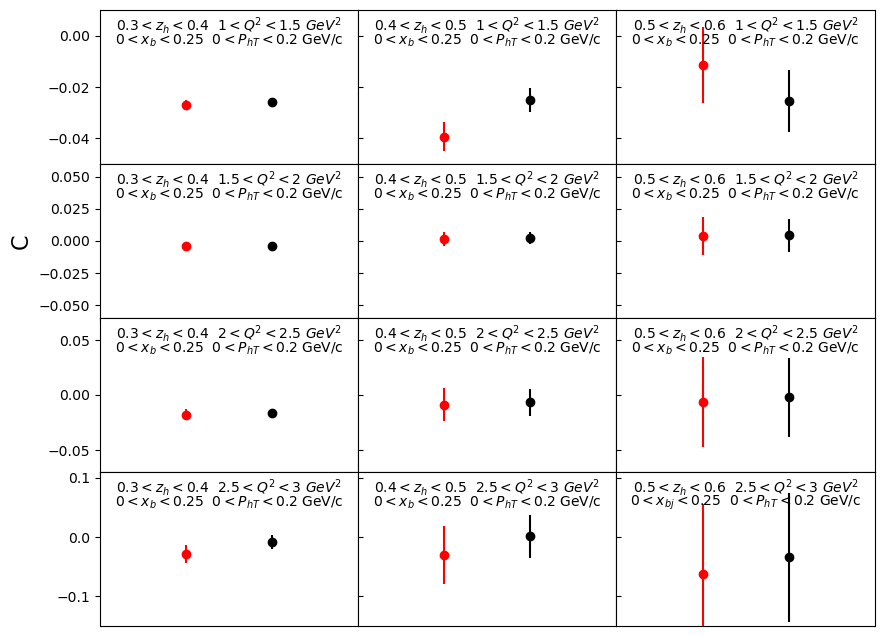

In [84]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
axs[0][0].set_xlim(-2,1)


Cmin1 = -0.05 ;Cmin2 = -0.06;Cmin3=-0.07;Cmin4=-0.15
Cmax1 = 0.01;Cmax2 = 0.06 ;Cmax3=0.07;Cmax4=0.11

axs[0][0].errorbar(0,pim_m_1_1.values[2],pim_m_1_1.errors[2],fmt='ok')
axs[0][0].errorbar(-1,m_1_1.values[2],m_1_1.errors[2],fmt='or')
axs[0][0].set_ylim(Cmin1,Cmax1)

axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)

axs[0][1].errorbar(0,pim_m_1_2.values[2],pim_m_1_2.errors[2],fmt='ok')
axs[0][1].errorbar(-1,m_1_2.values[2],m_1_2.errors[2],fmt='or')
axs[0][1].set_ylim(Cmin1,Cmax1)

axs[0][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[0][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
axs[0][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)

axs[0][2].errorbar(0,pim_m_1_3.values[2],pim_m_1_3.errors[2],fmt='ok')
axs[0][2].errorbar(-1,m_1_3.values[2],m_1_3.errors[2],fmt='or')
axs[0][2].set_ylim(Cmin1,Cmax1)

axs[0][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[0][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
axs[0][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)

axs[1][0].errorbar(0,pim_m_2_1.values[2],pim_m_2_1.errors[2],fmt='ok')
axs[1][0].errorbar(-1,m_2_1.values[2],m_2_1.errors[2],fmt='or')
axs[1][0].set_ylim(Cmin2,Cmax2)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
axs[1][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)

axs[1][1].errorbar(0,pim_m_2_2.values[2],pim_m_2_2.errors[2],fmt='ok')
axs[1][1].errorbar(-1,m_2_2.values[2],m_2_2.errors[2],fmt='or')
axs[1][1].set_ylim(Cmin2,Cmax2)

axs[1][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[1][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
axs[1][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)

axs[1][2].errorbar(0,pim_m_2_3.values[2],pim_m_2_3.errors[2],fmt='ok')
axs[1][2].errorbar(-1,m_2_3.values[2],m_2_3.errors[2],fmt='or')
axs[1][2].set_ylim(Cmin2,Cmax2)

axs[1][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[1][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
axs[1][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)

axs[2][0].errorbar(0,pim_m_3_1.values[2],pim_m_3_1.errors[2],fmt='ok')
axs[2][0].errorbar(-1,m_3_1.values[2],m_3_1.errors[2],fmt='or')
axs[2][0].set_ylim(Cmin3,Cmax3)

#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
axs[2][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)

axs[2][1].errorbar(0,pim_m_3_2.values[2],pim_m_3_2.errors[2],fmt='ok')
axs[2][1].errorbar(-1,m_3_2.values[2],m_3_2.errors[2],fmt='or')
axs[2][1].set_ylim(Cmin3,Cmax3)

axs[2][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[2][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
axs[2][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)

axs[2][2].errorbar(0,pim_m_3_3.values[2],pim_m_3_3.errors[2],fmt='ok')
axs[2][2].errorbar(-1,m_3_3.values[2],m_3_3.errors[2],fmt='or')
axs[2][2].set_ylim(Cmin3,Cmax3)

axs[2][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[2][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
axs[2][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)

axs[3][0].errorbar(0,pim_m_4_1.values[2],pim_m_4_1.errors[2],fmt='ok')
axs[3][0].errorbar(-1,m_4_1.values[2],m_4_1.errors[2],fmt='or')
axs[3][0].set_ylim(Cmin4,Cmax4)

axs[3][0].tick_params(axis='x',direction='in',bottom=False,labelbottom=False)
axs[3][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
axs[3][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)

axs[3][1].errorbar(0,pim_m_4_2.values[2],pim_m_4_2.errors[2],fmt='ok')
axs[3][1].errorbar(-1,m_4_2.values[2],m_4_2.errors[2],fmt='or')
axs[3][1].set_ylim(Cmin4,Cmax4)

axs[3][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[3][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)
axs[3][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)

axs[3][2].errorbar(0,pim_m_4_3.values[2],pim_m_4_3.errors[2],fmt='ok')
axs[3][2].errorbar(-1,m_4_3.values[2],m_4_3.errors[2],fmt='or')
axs[3][2].set_ylim(Cmin4,Cmax4)

axs[3][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[3][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)
axs[3][2].text(0.5,0.8,r'${}<x_{{bj}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)

axs[1][0].set_ylabel(r'C',fontsize=16)


#plt.show()
plt.savefig('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_modified/fit_Cs.pdf')